# EP03 - Classifiers for the Adult Dataset

## PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões
---
## Dados

$\texttt{Nome:}$ Nathália Yukimi Uchiyama Tsuno  
$\texttt{NUSP:}$ 14600541  
$\texttt{Hash:}$ 30  

# Importação de Dados e Biblioteca

Vamos importar nossos dados brutos e fazer a importação de bibliotecas de manipulação, visualização de dados e treinamento de modelos preditivos

In [1]:
"""
Importação de Bibliotecas
"""
# Manipulação de Dados
import pandas as pd
import numpy as np

# Plotagem de Dados
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Amostragem
from sklearn.impute import KNNImputer

# Encoders
from sklearn.preprocessing import LabelEncoder

# Normalizador
from sklearn.preprocessing import StandardScaler

# Split de Dados
from sklearn.model_selection import train_test_split

# Modelos Preditivos
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Setagem de Hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Métricas de Avaliação
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [2]:
plt.style.use('ggplot')

In [3]:
"""
Leitura de Dados
"""

# Leitura de dados de treino
dados_treino_brutos = pd.read_csv("/kaggle/input/adult-pmr3508/train_data.csv",
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# Leitura de dados de teste
dados_teste = pd.read_csv("/kaggle/input/adult-pmr3508/test_data.csv",
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# Definição de Valores

Ao longo do EP, vamos usando algumas constantes previamente setadas

In [4]:
HASH = 30 # O meu hash é 30, portanto, nada mais junto
SEED = HASH

# EDA

Nessa etapa do EP, vamos explorar, conhecer melhor e se tornar íntimos dos dados a serem trabalhados

## Análise Estatística

O método .describe() possibilita uma visão sobre a tendência central numérica e distribuição interquartil dos dados numéricos.

Facilmente, podemos denotar a média dos dados e o desvio padrão. Valores com médias muito discrpantes de suas medianas e/ou desvios padrões expressivamente grandes podem denotar a presença de outliers que precisam ser tratados adequadamente. Nesse viés, podemos observar que apenas "education.num" é o mais equilibrado de todos os atributos.

In [5]:
dados_treino_brutos.describe()

Id           age        fnlwgt  education.num  capital.gain  \
count  32560.000000  32560.000000  3.256000e+04   32560.000000  32560.000000   
mean   32559.500000     38.581634  1.897818e+05      10.080590   1077.615172   
std     9399.406719     13.640642  1.055498e+05       2.572709   7385.402999   
min    16280.000000     17.000000  1.228500e+04       1.000000      0.000000   
25%    24419.750000     28.000000  1.178315e+05       9.000000      0.000000   
50%    32559.500000     37.000000  1.783630e+05      10.000000      0.000000   
75%    40699.250000     48.000000  2.370545e+05      12.000000      0.000000   
max    48839.000000     90.000000  1.484705e+06      16.000000  99999.000000   

       capital.loss  hours.per.week  
count  32560.000000    32560.000000  
mean      87.306511       40.437469  
std      402.966116       12.347618  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

O método .info() possibilita a visão sobre os tipos dos dados e a quantidade respectiva deles. Nesse viés, temos 15 atributos válidos, distribuídos entre objetos e inteiros e que totalizam 32560 entradas.

In [6]:
dados_treino_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       30724 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      30717 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  31977 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


O método .head() possibilita uma amostra, por padrão, dos cinco primeiros elementos do Dataset. Assim, obtemos uma familiaridade inicial com os dados.

In [7]:
dados_treino_brutos.head()

Id  age     workclass  fnlwgt     education  education.num  \
0  16280   34       Private  204991  Some-college             10   
1  16281   58     Local-gov  310085          10th              6   
2  16282   25       Private  146117  Some-college             10   
3  16283   24       Private  138938  Some-college             10   
4  16284   57  Self-emp-inc  258883       HS-grad              9   

       marital.status         occupation   relationship   race     sex  \
0            Divorced    Exec-managerial      Own-child  White    Male   
1  Married-civ-spouse   Transport-moving        Husband  White    Male   
2       Never-married  Machine-op-inspct  Not-in-family  White    Male   
3            Divorced       Adm-clerical  Not-in-family  White  Female   
4  Married-civ-spouse   Transport-moving        Husband  White    Male   

   capital.gain  capital.loss  hours.per.week native.country income  
0             0             0              44  United-States  <=50K  
1             0             0              40  United-States  <=50K  
2             0             0              42  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4          5178             0              60        Hungary   >50K

Vamos eliminar a feature 'id', puramente técnica

In [8]:
dados_treino = dados_treino_brutos.drop('Id', axis=1)

## Distribuição do Target

Nesta etapa, perceba que o atributo "income" é descrito por dois tipos de objetos, onde, majoritariamente, a população é classificada como "<=50K" (análise socialmente viável, mas, não tão óbvio por uma análise puramente matemática).

In [9]:
dados_treino['income'].value_counts()

income
<=50K    24719
>50K      7841
Name: count, dtype: int64

### Bar Plot Feature

Recebe o atributo de um dataset, a feature, a paleta requisitada (setada, por padrão, para 'flare'), a cor do título (stado, por padrão, para '#7A206A') e a cor xtick (setado, por padrão, para '#F9A9B5')  
Faz a plotagem da distribuição das classes desses dados

In [10]:
def BarPlotFeature(df, feature, paleta='flare', color_title='#7A206A', color_xticks='#F9A9B5'):
    plt.figure(figsize=(12,6)) # Tamanho do plot
    sns.countplot(data=dados_treino,x=feature, hue=dados_treino[feature], palette=paleta) # O gráfico

    titulo = 'Distribuição da Feature ' + feature
    plt.title(titulo, color=color_title)
    plt.xticks(fontsize=16,rotation = 90, color=color_xticks) # O eixo X
    plt.yticks(fontsize=16) # O eixo Y
    plt.show()

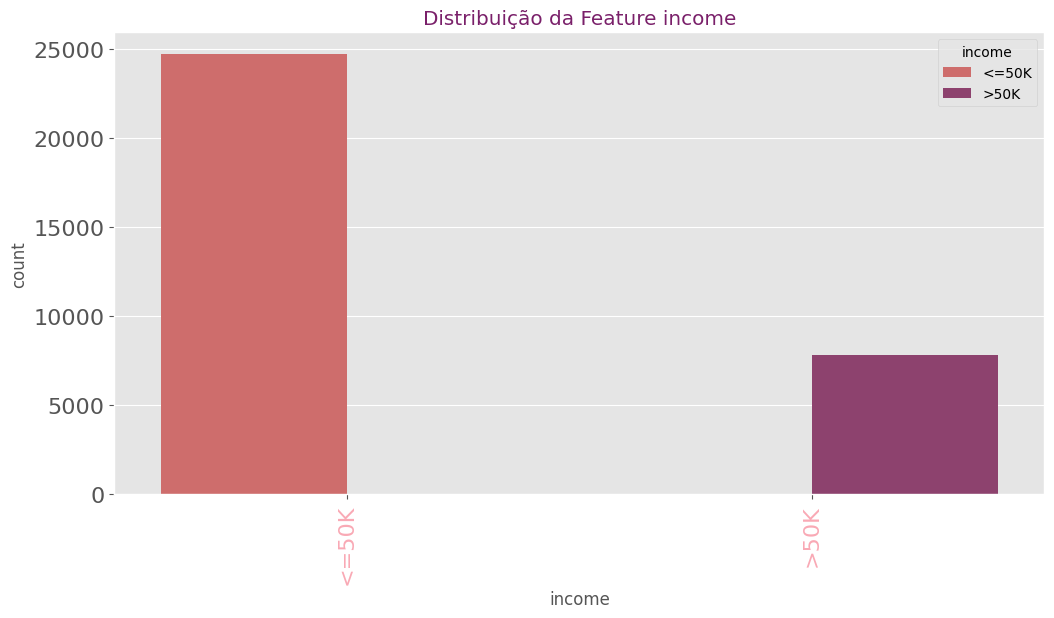

In [11]:
BarPlotFeature(dados_treino, 'income')

## Representação Gráfica

Gráficos são ferramentas poderosas no campo de análise de dados. Podemos observar e ter insights sobre a distribuição de dados. Podemos ter uma noção de como lidar com eles.

Em especial, também podemos localizar potenciais outliers.

### Representação Numérica

A partir de uma análise detalhada sobre a distribuição dos dados de cada atributo, podemos ter a seguinte visão:

### Age

A maior parte dos dados se concentra no intervalo entre 20 e 50 anos, embora, haja contribuição para idades mais avançadas. A tendência é mais uniforme para esse primeiro intervalo, haja vista sua classificação convencional de PEA (população economicamente ativa). Na versão do gráfico de densidade, percebemos a presença de uma assimetria positiva, à direita do gráfico.

Numa plotagem mais detalhada, subdividindo o atributo em dois grandes conjuntos, verificamos que, perto dos cinquenta anos, temos mais dados, ainda que entre [20, 50] houve um valor quase constante de pessoas fornecendo seus dados. Por outro lado, para idades mais avançadas, a tendência é um gráfico não crescente, com destaque especial para os idosos de 90 anos.

No ViolinPlot, notamos que a maior parte dos dados dessa categoria, tais que tem o income "<=50K" tem maior concentração nos jovens (entre 20 e 30 anos, geração Y e Z, no início de suas carreiras numa época mais atual), com mediana deslocada para entre 30 e 40 anos. Em especial, a média se concentra um pouco acima da mediana.

Por outro lado, os mais ricos tem entre 40 e 50 anos, com densidade, média e mediana centradas nessa região. São a geração X e Boomer, com mais experiêcia de vida e profissional também.

Finalmente, no Bloxplot, confirmamos a observação sobre o ViolinPlot, mas, com destaque para os outliers, numa região de 80 anos ou mais para aqueles com "income <= 50K" e de 70 anos ou mais, para "> 50K".

### Fnlwgt

É o grau de importância do indivíduo para a amostra dos dados. Muito útil para análises ponderadas. No histograma, notamos que a maioria se concentra em torno de 200000. Como os valores são do tipo float, vamos evitar a plotagem focada para economizar recursos computacionais desnecessários.

No ViolinPlot, a média, a mediana e a densidade de dados, de fato, se concentram no 200.000, tanto para "<=50K", como para ">50K". O que mostra a independência em condição à variável income.

No BoxPlot, acresecentamos a presença pesada de outliers para mais de 400.000 em ambas as divisões.

### Education Number

No histograma, podemos observar que a maioria das pessoas tem 10 a 14 anos de escolaridade. Isto significa, a níveis brasileiros, o equivalente ao médio completo.

Particionando esses intervalos de 1 a 7 anos, de 8 a 11 anos e de 12 a 16 anos, temos alguns contrastes. No primeiro intervalo, a maioria se concentra nos 7 anos de escolaridade. No segundo, a concentração está uniformemente entre 9 e 10 anos. E, por fim, no último, em 14 anos. Temos um gráfico multimodal.

ViolinPlot indica uma mediana próxima aos 9 anos, com média aos 10, para "<=50K". Por outro lado, para ">50K", a mediana é de 13, com média próxima aos 12.5. Com isso, podemos ter uma noção inicial de que, quanto maior a escolaridade, maior a chance de ter uma renda maior.

Finalmente, o BoxPlot indica alguns outliers menores e maiores que a concentração dos dados para aqueles que recebem "<=50K" e maiores para ">50K". Novamente, investigamos que, os mais ricos tem, geralmente, maior grau de escolaridade, sendo raros os casos em que a pessoa teve pouco estudo e se tornou rica.

### Capital Gain

No histograma, podemos perceber que a esmagadora maioria dos entrevistados não possui ganhos de capital. Como um outlier visível, temos alguns casos em que o ganho de capital é de 100.000, uma área distinta da concentração de dados.

No ViolinPlot, notamos que a maioria das pessoas que recebem "<=50K" não tem ganhos de capital, ao passo que os mais ricos tem algum ganho de capital (embora a mediana seja 0, a média é deslocada positivamente).

No BoxPlot, é mais claro ver outliers sobre isso. Em especial, para os mais pobres, o intervalo de ganhos é mais curto e mais concentrado para valores do que 10000. Para os mais ricos, os valores chegam a 20000, com um diferenciado que alcançou 100.000.

### Capital Loss

No histograma, podemos perceber que a esmagadora maioria dos entrevistados não possui perdas de capital. Como um outlier visível, temos alguns casos em que a perda de capital é de 4.000, uma área distinta da concentração de dados.

No ViolinPlot, notamos que a maioria das pessoas que recebem "<=50K" não tem perdas de capitais, embora, ainda haja uma amostra mais relevante do que os ganhos. Isso significa que aqueles que tentam algum investimento, geralmente, o perdem. Por outro lado, os mais ricos tem mais perdas de capitais.

No BoxPlot, é mais claro ver outliers sobre isso. Em especial, para os mais pobres, o intervalo de perdas é mais longo e mais concentrado para valores próximos a 2000, com um maior que passa os 4000. Para os mais ricos, as perdas são mais concentradas a valores em torno de 2500.

### Horas Por Semana

No histograma, a maioria das pessoas trabalha 40 horas semanais, com outliers próximos a 100 horas. Subdividindo esses dados em intervalos de [1, 30], [31, 60], [60, 99], notamos que, no primeiro intervalo, a concentração se dá em torno de 20 e de 25 horas, com os demais horários com uma frequẽncia menor do que 500.
No segundo, 40, com os demais valores com frequência menor do que 5000. E, finalmente, para o último, 60. Os demais se encontram com frequência menor do que 500 também.

No ViolinPlot, notamos que os que ganham "<=50K" normalmente, trabalham 40 horas semanais, mas, com ampla distribuição para mais e para menos. Por outro lado, os mais ricos trabalham mais, com mediana de 40 horas e média de cerca de 45. A tendência é de que, quanto mais tempo de trabalho, mais rico é.

O BoxPlot indica outliers para mais e para menos para ambos os casos, embora a concentração de "<=50K" seja mais densa e mais baixa do que os mais ricos.

#### Distribuição Histograma

Recebe um dataset, um valor para binsN e uma paleta (setado, por padrão, para 'twilight')  
Faz a plotagem do Histograma desses dados

In [12]:
def DistribuicaoHistograma(df, binsN, paleta='twilight'):
    # Separação de dados numéricos
    numeric_cols = df.select_dtypes(include=np.number).columns 

    # Plotagem em Grid
    # Setagem do SubGrid
    n_rows = len(numeric_cols) // 3 # Número de linhas
    n_cols = 3 # Número de colunas. São dois plots por linha
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4)) # Cada subgrid ocupa uma casinha 4x4

    # Garantir que Axes Seja uma Lista Unidimensional para Iteração
    axes = axes.flatten()

    # Paleta de Cores
    palette = sns.color_palette(paleta, binsN)

    # Iteração Sobre as Colunas Numéricas e Plotagem dos Histogramas
    for i, col in enumerate(numeric_cols):
        ax = axes[i]  # Seleciona o subplot
        
        # Remove NaN e valores infinitos
        valid_data = df[col].dropna()  # Remove valores NaN
        valid_data = valid_data[~valid_data.isin([np.inf, -np.inf])]  # Remove valores infinitos
        
        # Verifica se há dados válidos para o histograma
        if len(valid_data) == 0:
            ax.set_title(f"{col} - No valid data")
            continue  # Pula a iteração para essa coluna
        
        # Obtemos os valores do histograma
        values, bin_edges = np.histogram(valid_data, bins=binsN)
        
        # Plotando as barras do histograma com cores diferentes para cada uma
        for j in range(len(values)):
            ax.bar(bin_edges[j], values[j], width=bin_edges[j+1] - bin_edges[j],
                    color=palette[j], align='edge')
    
        # Definir título e labels
        ax.set_title(col, color=palette[binsN//2])
        ax.set_xlabel('Valores')
        ax.set_ylabel('Frequência')
    
    # Ajuste o layout para evitar sobreposição de títulos
    plt.suptitle("Distribuição de Histogramas", fontsize=16, color=palette[binsN//2])
    plt.tight_layout()
    plt.show()

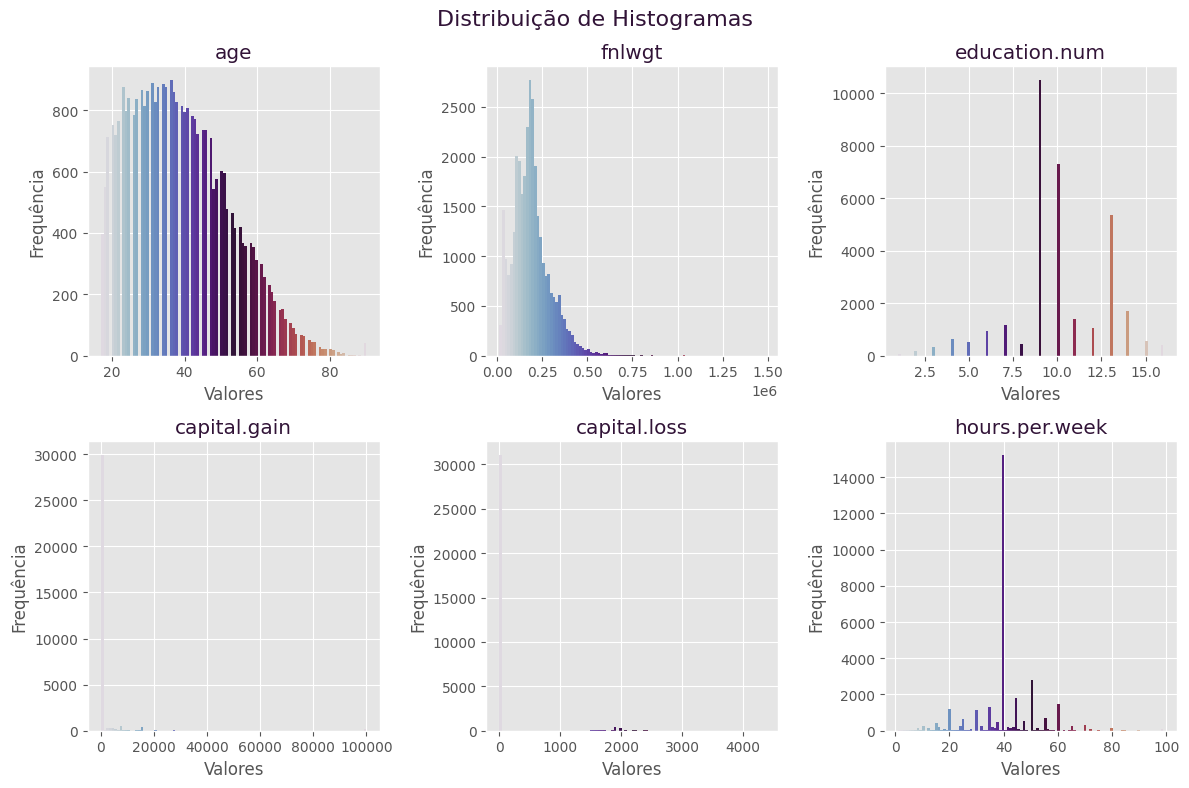

In [13]:
DistribuicaoHistograma(dados_treino, 100)

### Distribuição Densidade 

Recebe um dataset e uma cor (setado, por padrão, para '#6A2C6E')  
Faz a plotagem do Histograma desses dados

In [14]:
def DistribuicaoDensidade(df, color='#6A2C6E'):
    warnings.simplefilter("ignore")
    # Seleção de Atributos Numéricos Para Plotagem Gráfica
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    # Setagem do SubGrid
    n_rows = len(numeric_cols) // 3 # Número de linhas
    n_cols = 3 # Número de colunas
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
    
    # Garantir que Axes Seja uma Lista Unidimensional para Iteração
    axes = axes.flatten()
    
    # Iteração Sobre as Colunas Numéricas e Plotagem dos Histogramas
    for i, col in enumerate(numeric_cols):
        ax = axes[i]  # Seleciona o subplot
    
        # Remove NaN e valores infinitos
        valid_data = df[col].dropna()  # Remove valores NaN
        valid_data = valid_data[~valid_data.isin([np.inf, -np.inf])]  # Remove valores infinitos
        
        # Verifica se há dados válidos para o histograma
        if len(valid_data) == 0:
            ax.set_title(f"{col} - No valid data")
            continue  # Pula a iteração para essa coluna
        
        sns.kdeplot(valid_data, ax=ax, color=color) # Plota a curva de densidade
        
        # Definir título e labels
        ax.set_title(col, color=color)
        ax.set_xlabel('Valores')
        ax.set_ylabel('Frequência')
    
    # Ajuste o layout para evitar sobreposição de títulos
    plt.suptitle("Distribuição de Densidade", fontsize=16, color=color)
    plt.tight_layout()
    plt.show()

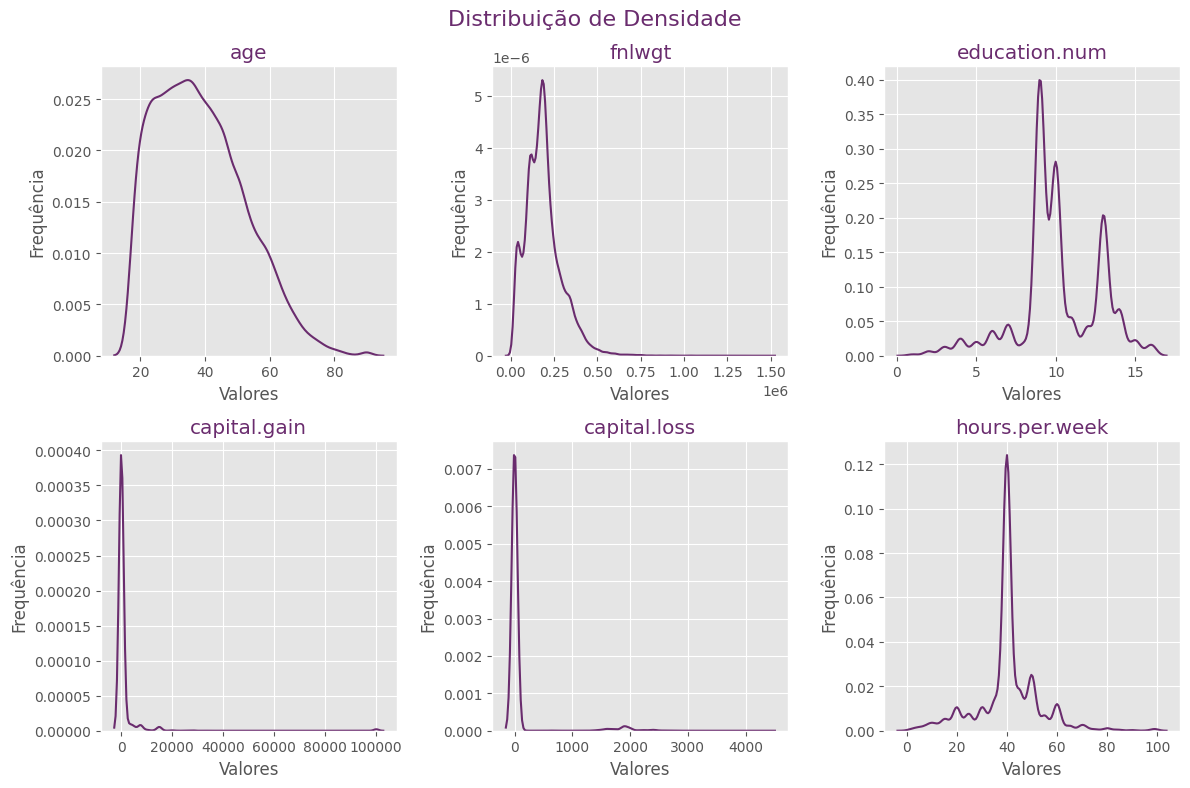

In [15]:
DistribuicaoDensidade(dados_treino)

#### Distribuição Violin

Recebe um dataset, o target, uma cor (setada, por padrão, para '#43223b') para título, para média ('#0fc3e8') e uma paleta ('mako')  
Faz a plotagem da distribuição violina

In [16]:
def DistribuicaoViolin(df, target, color='#43223b', mean_color='#0fc3e8', paleta='mako'):
    # Identificando os atributos numéricos
    attributes = df.select_dtypes(include=np.number).columns
    
    # Calculando o número de subgráficos necessários
    n_attributes = len(attributes)
    ncols = 3  # Número de colunas no grid
    nrows = (n_attributes) // ncols  # Número de linhas necessárias para acomodar todos os gráficos
    
    # Criando o grid de subgráficos
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, 5 * nrows))
    
    # Garantir que axes seja sempre uma lista plana
    axes = axes.flatten()
    
    # Criando um gráfico de violino para cada atributo
    for i, attribute in enumerate(attributes):
        sns.violinplot(x=target, y=attribute, data=df, ax=axes[i], palette=paleta)
        axes[i].set_title(f'Violin Plot for {attribute}', color=color)

        # Calculando a média para cada grupo de 'target'
        mean_values = df.groupby(target)[attribute].mean()

        # Adicionando um ponto para a média de cada grupo
        for j, mean in enumerate(mean_values):
            axes[i].scatter(j, mean, color=mean_color, s=20, edgecolor='black', label='Média', zorder=10)
            axes[i].text(j, mean + 0.1, f'{mean:.2f}', color=mean_color, horizontalalignment='center', fontsize=10)
    
    # Ajustar layout para não sobrepor os gráficos
    plt.suptitle("Distribuição Violin", fontsize=16, color=color)
    plt.tight_layout()
    plt.show()

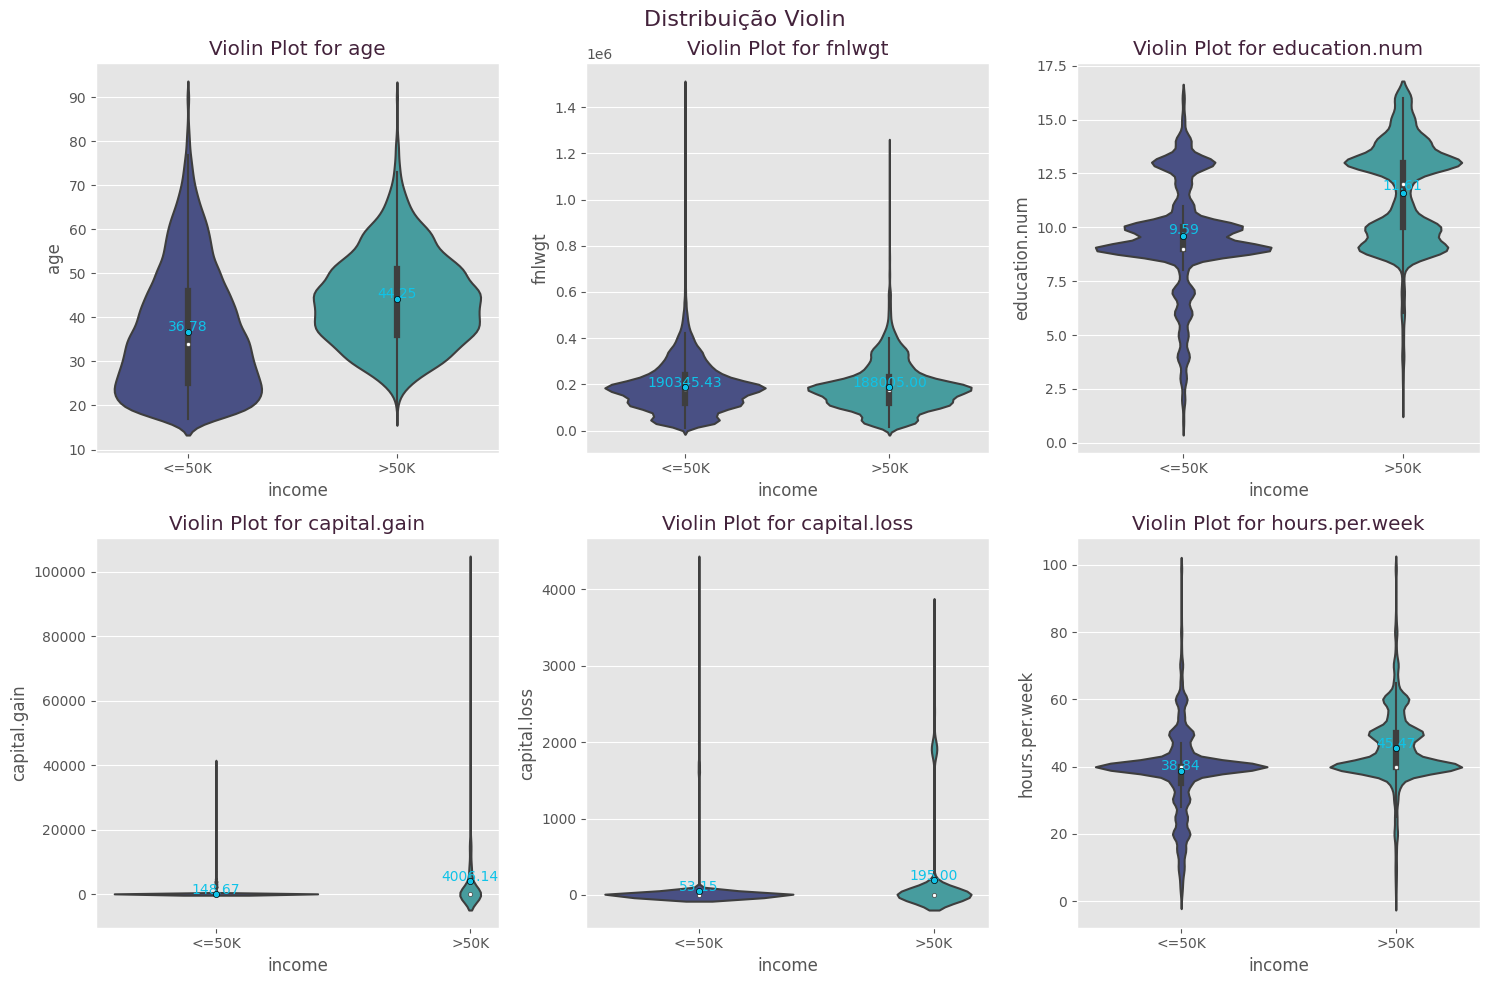

In [17]:
DistribuicaoViolin(dados_treino, 'income')

#### Distribuição Box Plot

Recebe um dataset, o target, uma cor (setada, por padrão, para '#007122') para título e uma paleta ('viridis')  
Faz a plotagem da distribuição violina

In [18]:
def DistribuicaoBoxPlot(df, target, color='#007122', paleta='viridis'):
    # Identificando os atributos numéricos
    attributes = df.select_dtypes(include=np.number).columns
    
    # Calculando o número de subgráficos necessários
    n_attributes = len(attributes)
    ncols = 3  # Número de colunas no grid
    nrows = (n_attributes) // ncols  # Número de linhas necessárias para acomodar todos os gráficos
    
    # Criando o grid de subgráficos
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, 5 * nrows))
    
    # Garantir que axes seja sempre uma lista plana
    axes = axes.flatten()
    
    # Criando um gráfico de violino para cada atributo
    for i, attribute in enumerate(attributes):
        sns.boxplot(x=target, y=attribute, data=df, ax=axes[i], palette=paleta)
        axes[i].set_title(f'Violin Plot for {attribute}', color=color)
    
    # Ajustar layout para não sobrepor os gráficos
    plt.suptitle("Distribuição BoxPlot", fontsize=16, color=color)
    plt.tight_layout()
    plt.show()

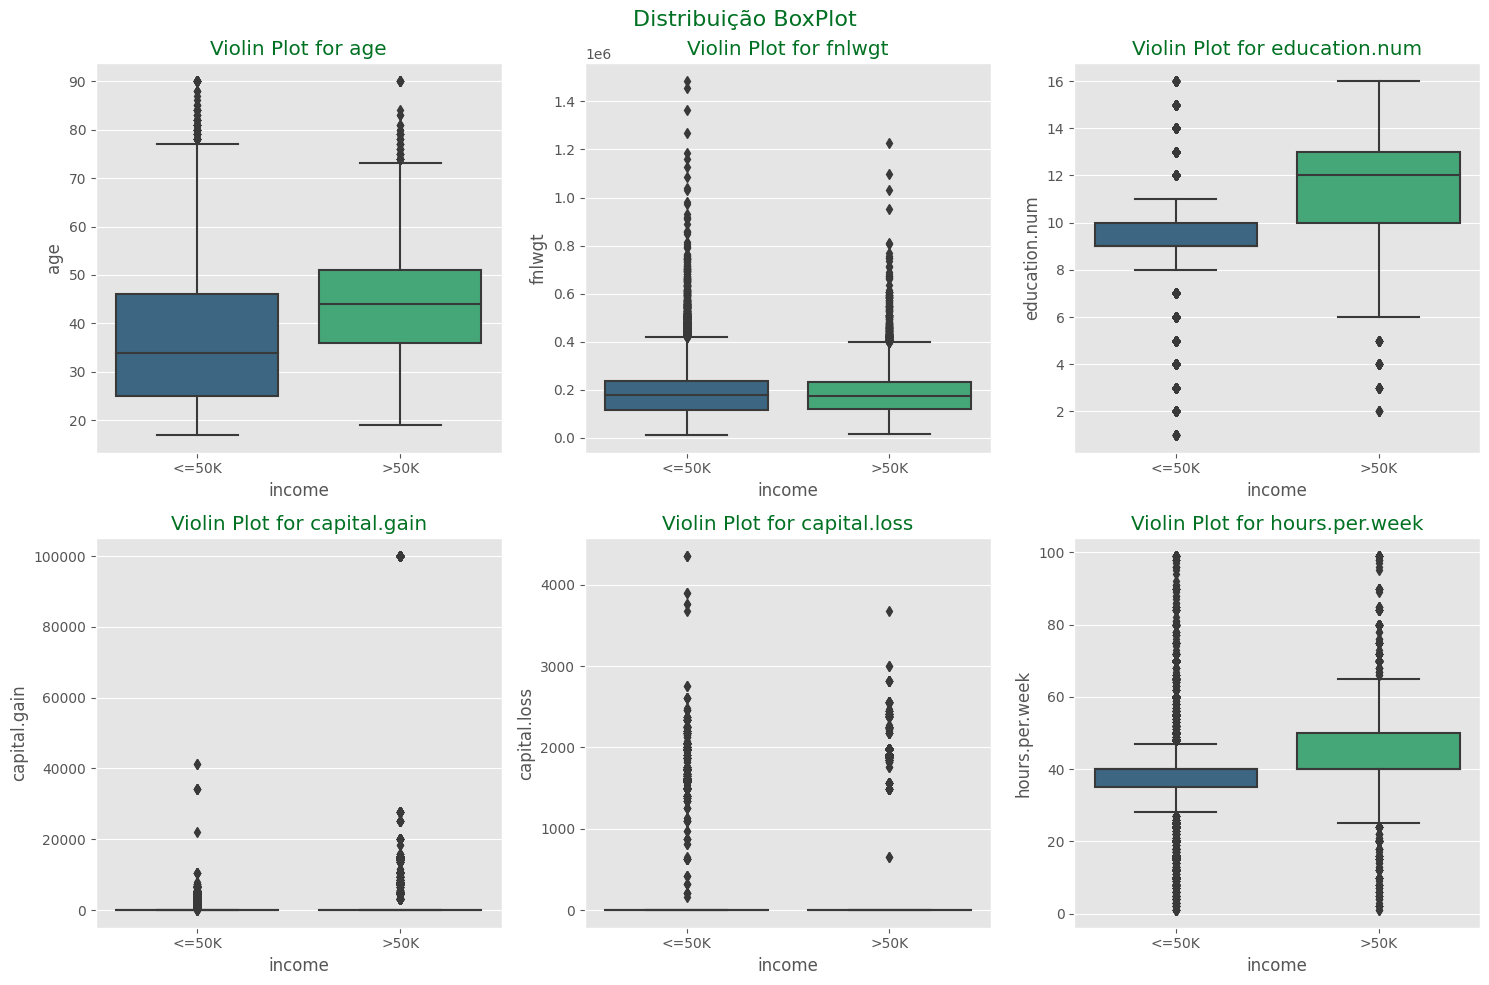

In [19]:
DistribuicaoBoxPlot(dados_treino, 'income')

### Representação Categórica

A partir de uma análise detalhada sobre os dados, podemos observar a conseguinte sobre os dados:

### Workclass

A esmagadora maioria dos trabalhadores trabalha em empresas privadas (o que justifica o modelo de jornada trabalhista de 40 horas). Prosseguido de trabalhadores "self-emp-inc" de funcionários de prefeituras.

Também é notório perceber a quantidade de "NaN"s, representados pela interrogação. Estes são indicativos de Missing Values que devem ser tratados posteriormente, pois atrapalham o processamento dos dados. Felizmente, eles não são TÃO significativos a ponto de forçar a exclusão dessa coluna de dados.

Separando em categorias pela target "income", notamos que, tal como a maioria que ganha menos do que 50.000, a maioria que recebe mais do 50K também trabalha em empresas privadas. Tanto a termos absolutos, quanto percentuais.

Por outro lado, muitas pessoas que não responderam ganham menos do que 50K, o que pode atrapalhar um pouco a análise. Em seguida, temos os "self-emp-not-inc" e, então, "local-gov".

Também há categorias não representativas, como os que nunca trabalharam e os desempregados que precisam de tratamento.

### Education

Agora, na versão categórica, confirmamos que a maioria da população concluiu apenas o Ensino Médio. Seguindo daqueles que fizeram alguma gradução e os que tem bacharelado. Os anos fundamentais estão espalhados por todo o gráfico. E a pré-escola é a menos significativa de todas. Nesse viés, precisa ser tratada para não ser considerada um outlier.

Quando separamos em categorias, a maior parte daqueles que recebem menos do que 50K concluíram apenas o Ensino Médio, seguido daqueles que fizeram alguma faculdade e, depois, daqueles que possuem um bacharelado. A termos percentuais esse valor fica ainda mais discrepante.

Aos que recebem mais são, sobretudo, os que possuem bacharelado, seguido de Ensino Médio Completo. Aos que fizeram Mestrado, a diferença também é gritante.

Isso confirma que, quanto maior a escolaridade, maior a tendência de renda.

### Marital Status

No histograma, verificamos que a maioria das pessoas é casada, seguida dos solteiros e dos divorciados. Uma classe rara são os casados com militares, que podem acabar se tornando outliers.

Quando separamos em categorias pelo "income", verificamos que a maioria que recebe menos que 50K são solteiros, seguidos dos casados e dos divorciados. Por outro lado, a esmagadora maioria dos mais ricos são casados, tanto em termos absolutos, quanto percentuais.

### Ocupation

No histograma, a maioria dos entrevistados trabalha com "Prof-specialty", "Craft-repair", "Exec-managerial", "Adm-clerical" e "Sales", com contraste aos que trabalham nas forças armadas (por isso, há poucos casados com aqueles que possuem esta ocupação).

Além disso, temos pelo menos 1500 casos de Missing Values, representados pela interrogação.

Quando separamos em categorias pelo "income", verificamos que a maioria que recebe menos que 50K são "Adm-clerical", "Craft-repair", "Sales" ou fazem outro serviços.

Por outro lado, os mais ricos são "Exec-Managerial" e "Prof-specialty". E isso é mais gritante quando aplicamos a termos percentuais.

Os NaNs tem parcela significativa na distribuição dos que recebem menos que 50K.

### Relationship

Maioria dos entrevistados se apresentam como Maridos, seguidos daqueles que não estão numa família.

Quando separamos em categorias pelo "income", verificamos que a maioria não estão em uma família, seguido por aqueles que são maridos. Mas, entre os mais ricos, em geral, são os maridos. Aqui devemos dar uma atenção especial aos filhos e a outros parentes entre os que recebem ">50K".

### Race

Pelo histograma, a maioria se consagra como brancos, seguidos pelos negros. Damos uma atenção especial aos esquimós/ameríndios, que são pouco representativos e poderiam ser unidos a "outros", para evitar tratamento como outlier.

Quando separamos em categorias pelo "income", verificamos que a maioria dos que recebem "<=50K" são brancos, embora o mesmo cenário se repita com os mais ricos. Inclusive, a termos percentuais, os brancos recebem mais do que 50K do que os que recebem menos. Isso se repete aos leste-asiáticos.

### Sex

Pelo histograma, verificamos que a maioria dos entrevistados são homens.

Quando separamos em categorias pelo "income", verificamos que a maioria dos que recebem "<=50K" são homens, tal como entre os mais ricos.

Percentualmente, ainda assim, homens recebem mais do que as mulheres em ambos os quesitos. E, além disso, há mais mulheres que recebem menos do que 50K do que o contrário.

### Native Country

A esmagadora maioria dos entrevistados são estadunidenses, seguido dos mexicanos e os NaN (parcela significativa que precisa ser tratada entre os Missing Values). Por outro lado, o resto da população mundial é expressivamente insignificativa e é estratégico uní-los em grupos de semelhança.

Quando separamos em categorias pelo "income", verificamos que a maioria que a maioria dos que recebem "<=50K" são dos EUA, tal como entre os mais ricos. Em seguida ao México.

### Distribuição Bar Plot

Recebe um dataset, a quantidade de dados a serem plotados (por padrão, os 100 primeiros), uma paleta ('twilight') e uma cor para título ('#45094d')  
Faz a plotagem das distribuições categóricas

In [20]:
def DistribuicaoBarPlot(df, n=100, paleta='twilight', color='#45094d'):
    warnings.simplefilter("ignore")

    # Selecionar apenas Categóricos
    novoDf = df.select_dtypes(include=['object', 'category'])
    novoDf = novoDf.drop('income', axis=1)
    
    # Subgrids (Subgráficos em uma coluna)
    # Calculando o número de linhas (ceil para arredondar para cima caso não seja múltiplo de 2)
    n_rows = (len(novoDf.columns) + 1) // 3  # +1 para lidar com o caso ímpar
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(50, 40))  # Tamanho ajustado para uma melhor visualização
    axes = axes.flatten()  # Transformando em um vetor 1D para fácil acesso
    
    for i, coluna in enumerate(novoDf.columns):
        # Contando as frequências das categorias e pegando as 'n' mais frequentes
        frequencias = df[coluna].value_counts().head(n)

        # Criando um DataFrame a partir das frequências
        frequencias_df = pd.DataFrame({'Categoria': frequencias.index, 'Frequência': frequencias.values})

        # Plotando o gráfico de barras
        sns.barplot(x='Categoria', y='Frequência', data=frequencias_df, ax=axes[i], palette=paleta)

        # Adicionando título
        title = 'Distribuição em Barras de ' + coluna
        axes[i].set_title(title, color=color, fontsize=20)

        # Ajustando o rótulo do eixo x
        axes[i].tick_params(axis='x', rotation=90, labelsize=18)
        axes[i].tick_params(axis='y', labelsize=15)

    plt.suptitle("Distribuição Bar Plot", fontsize=30, color=color, y=1.02)
    # Ajustando o layout para evitar sobreposição de gráficos
    plt.tight_layout()
    # Exibindo o gráfico
    plt.show()

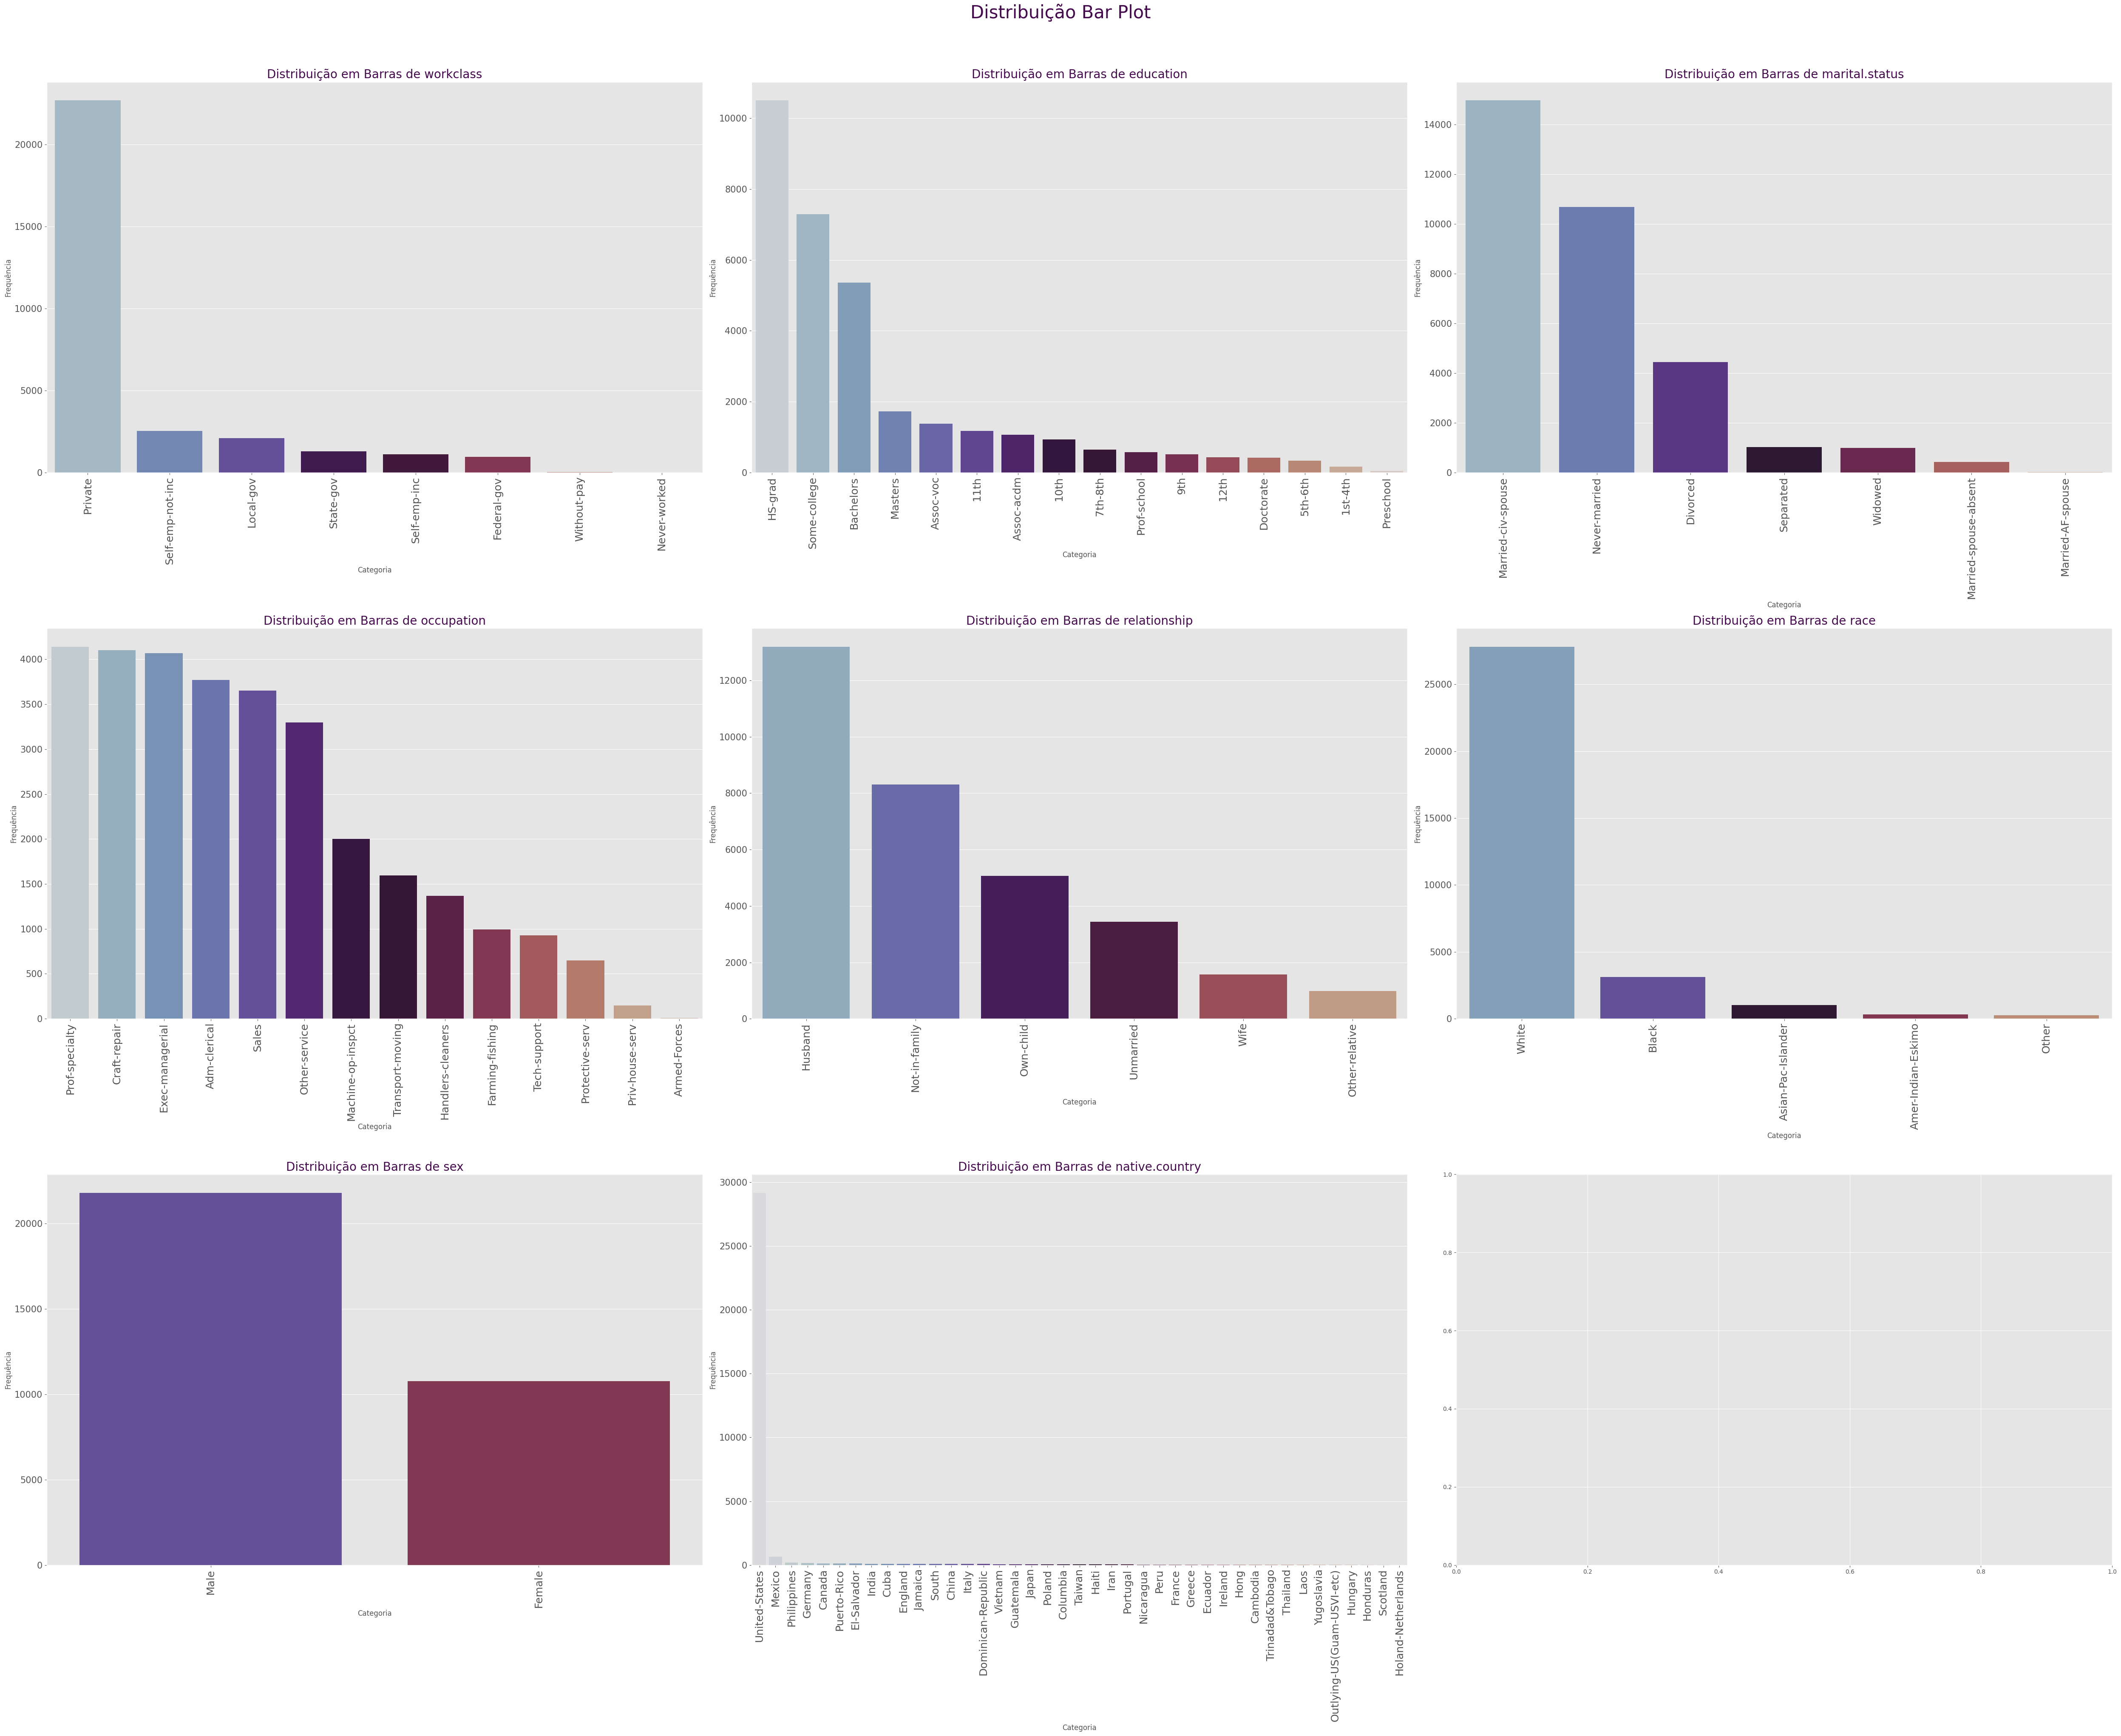

In [21]:
DistribuicaoBarPlot(dados_treino, len(dados_treino))

### Distribuição Bar Plot Target

Recebe um dataset, um target, uma paleta (por padrão, sns.diverging_palette(250, 30, l=65, center="dark")) e uma cor para títulos ('#0e4c65')  
Faz a plotagem por contagem de cada classe das categorias, dado o target

In [22]:
def DistribuicaoBarPlotTarget(df, target, paleta = sns.diverging_palette(250, 30, l=65, center="dark"), color='#0e4c65'):
    warnings.simplefilter("ignore")

    # Selecionar apenas Categóricos
    novoDf = df.select_dtypes(include=['object', 'category'])
    novoDf = novoDf.drop('income', axis=1)
    
    # Subgrids (Subgráficos em uma coluna)
    # Calculando o número de linhas (ceil para arredondar para cima caso não seja múltiplo de 2)
    n_rows = (len(novoDf.columns) + 1) // 3  # +1 para lidar com o caso ímpar
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(50, 40))  # Tamanho ajustado para uma melhor visualização
    axes = axes.flatten()  # Transformando em um vetor 1D para fácil acesso
    
    for i, coluna in enumerate(novoDf.columns):
        sns.countplot(x = coluna, hue= target, data=df, ax = axes[i], palette=paleta)

        # Adicionando título
        title = 'Distribuição em Barras de ' + coluna
        axes[i].set_title(title, color=color, fontsize=20)

        # Ajustando o rótulo do eixo x
        axes[i].tick_params(axis='x', rotation=90, labelsize=18)
        axes[i].tick_params(axis='y', labelsize=15)

    plt.suptitle("Distribuição Bar Plot", fontsize=30, color=color, y=1.02)
    # Ajustando o layout para evitar sobreposição de gráficos
    plt.tight_layout()
    # Exibindo o gráfico
    plt.show()

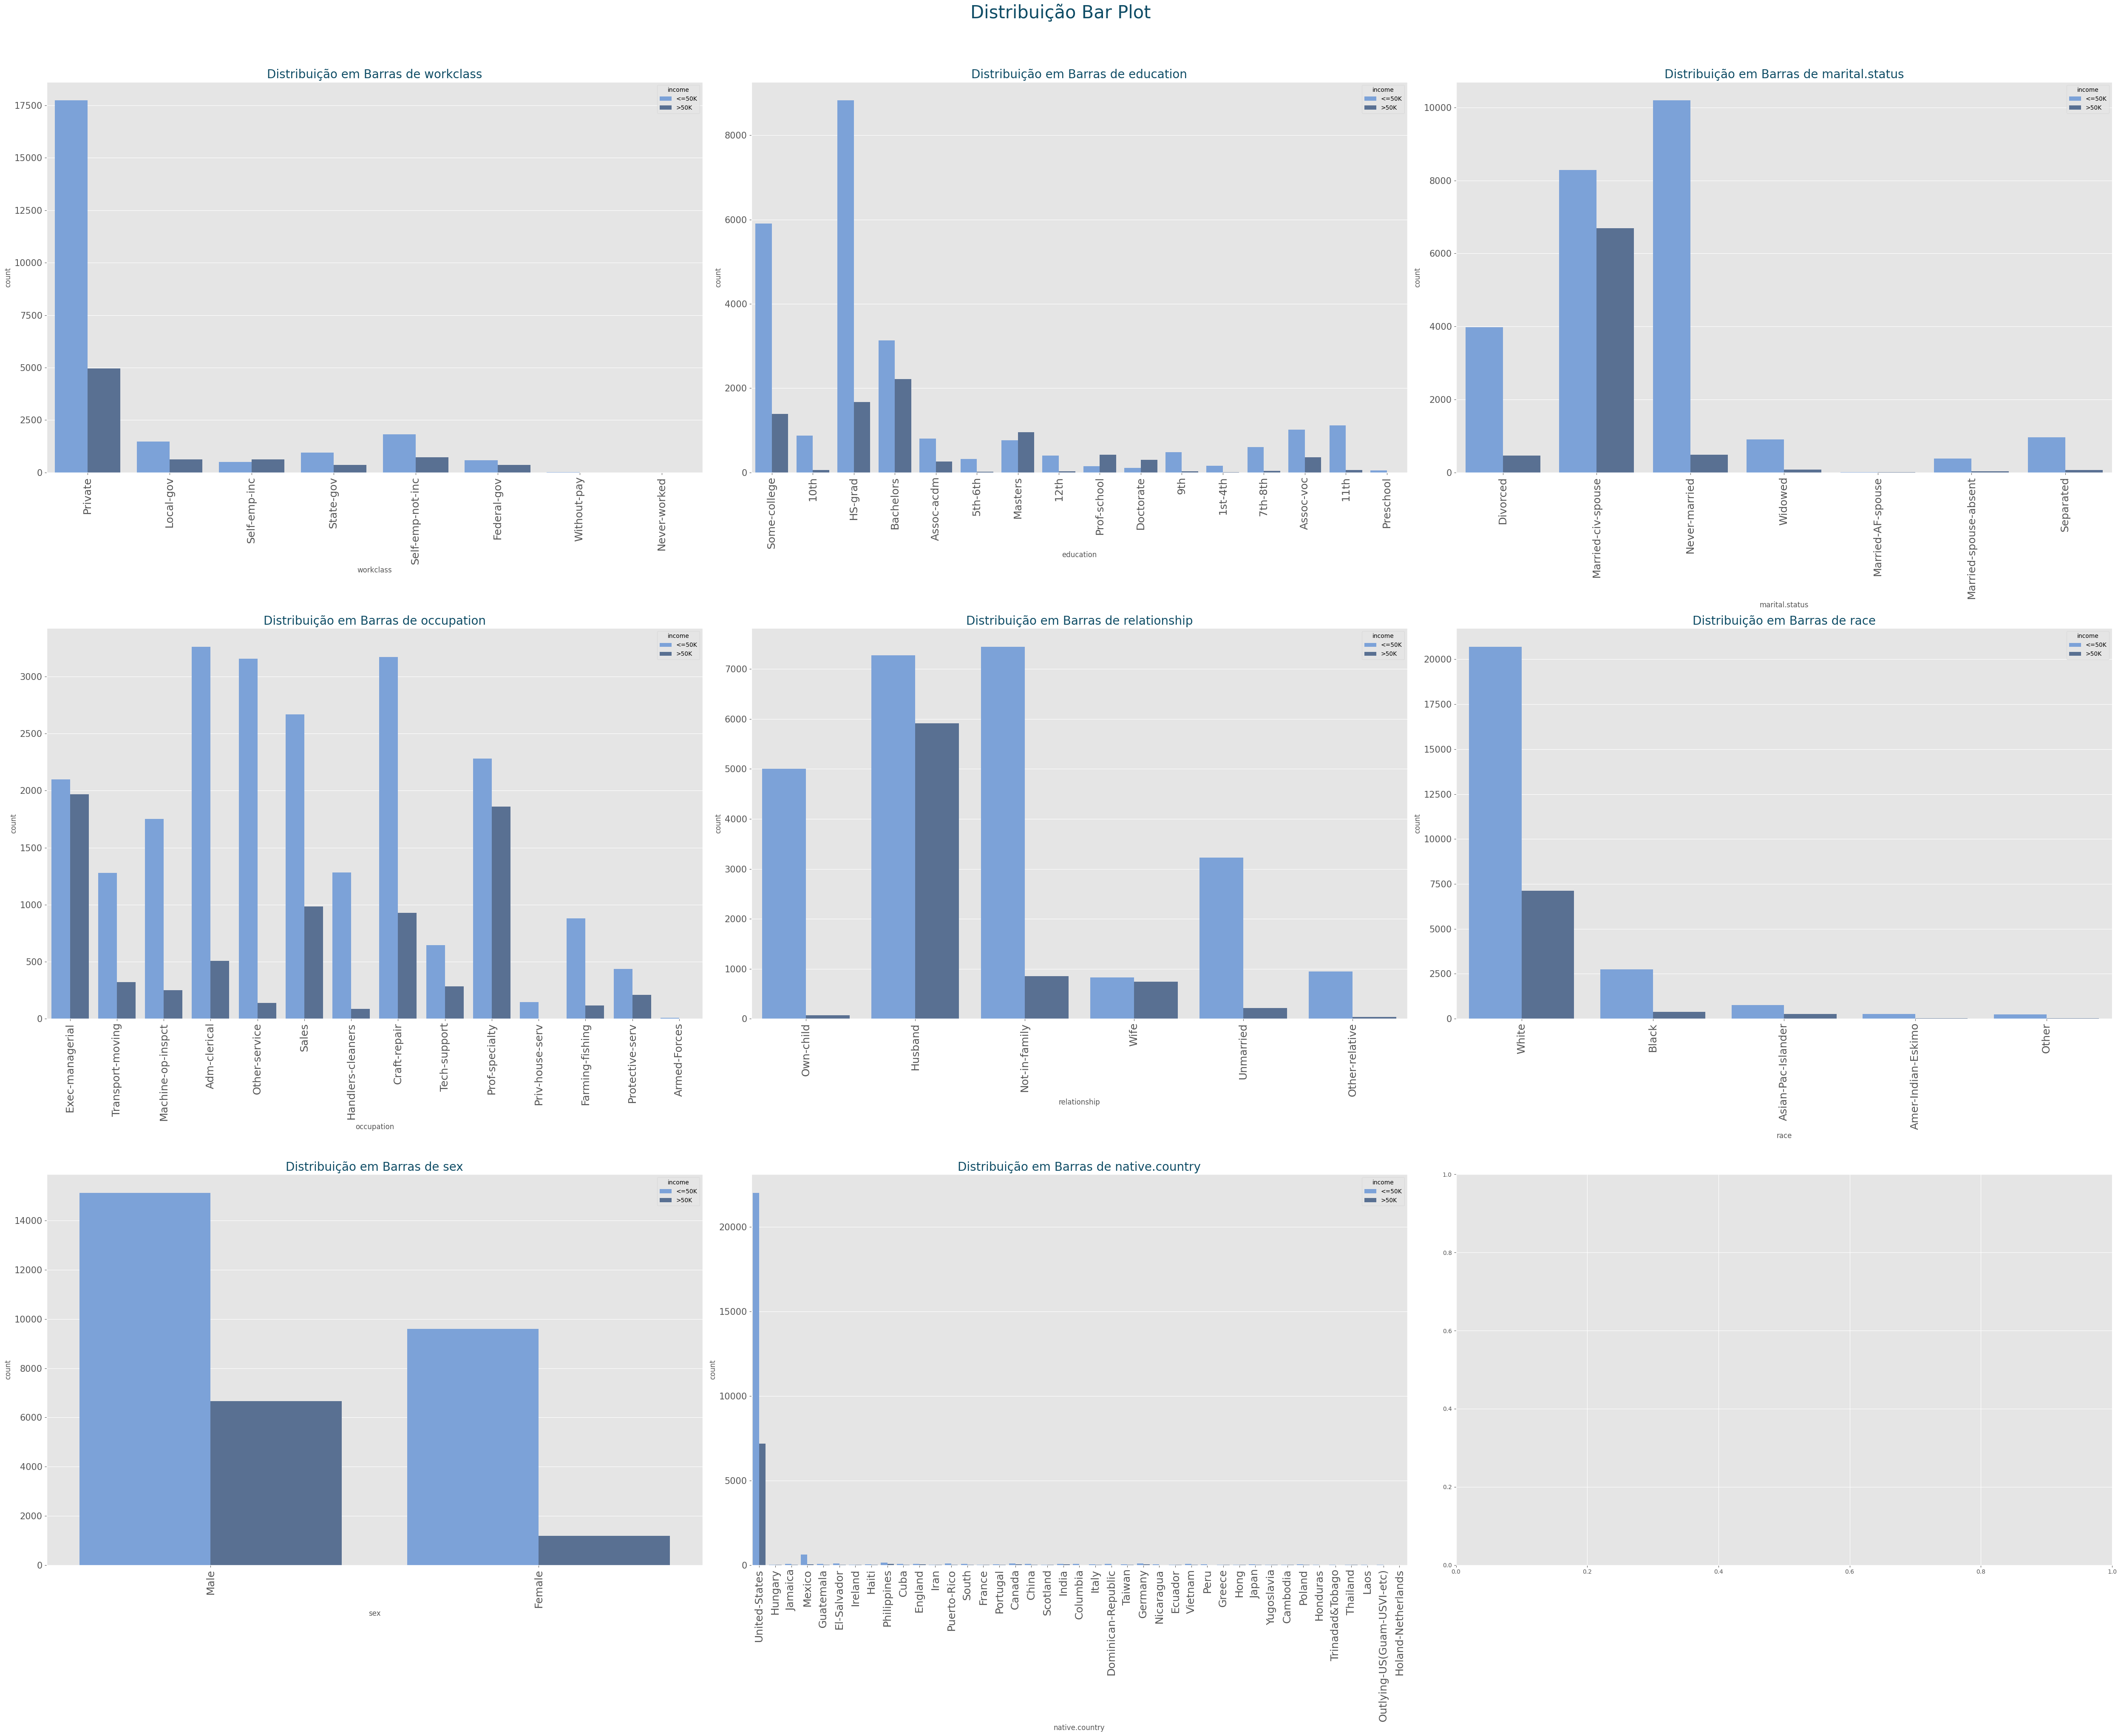

In [23]:
DistribuicaoBarPlotTarget(dados_treino, 'income')

### Distribuição Histograma Target

Recebe um dataset, um target, uma paleta (setado, por padrão, para sns.light_palette("seagreen", reverse=True)) e um cor para título ('#005c39')  
Faz a plotagem das porcentagens de cada classe dos atributos

In [24]:
def DistribuicaoHistogramaTarget(df, target, paleta = sns.light_palette("seagreen", reverse=True), color = '#005c39'):
    warnings.simplefilter("ignore")

    # Selecionar apenas Categóricos
    novoDf = df.select_dtypes(include=['object', 'category'])
    novoDf = novoDf.drop('income', axis=1)
    
    # Subgrids (Subgráficos em uma coluna)
    # Calculando o número de linhas (ceil para arredondar para cima caso não seja múltiplo de 2)
    n_rows = (len(novoDf.columns) + 1) // 3  # +1 para lidar com o caso ímpar
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(50, 40))  # Tamanho ajustado para uma melhor visualização
    axes = axes.flatten()  # Transformando em um vetor 1D para fácil acesso
    
    for i, coluna in enumerate(novoDf.columns):
        sns.histplot(data=df, x=coluna, hue='income', multiple='dodge',
                stat='percent', shrink=0.5, common_norm=False, legend=False, ax = axes[i], palette=paleta)

        # Adicionando título
        title = 'Distribuição da Porcentagem de ' + coluna
        axes[i].set_title(title, color=color, fontsize=20)

        # Ajustando o rótulo do eixo x
        axes[i].tick_params(axis='x', rotation=90, labelsize=18)
        axes[i].tick_params(axis='y', labelsize=15)

    plt.suptitle("Distribuição em Histograma", fontsize=30, color=color, y=1.02)
    # Ajustando o layout para evitar sobreposição de gráficos
    plt.tight_layout()
    # Exibindo o gráfico
    plt.show()

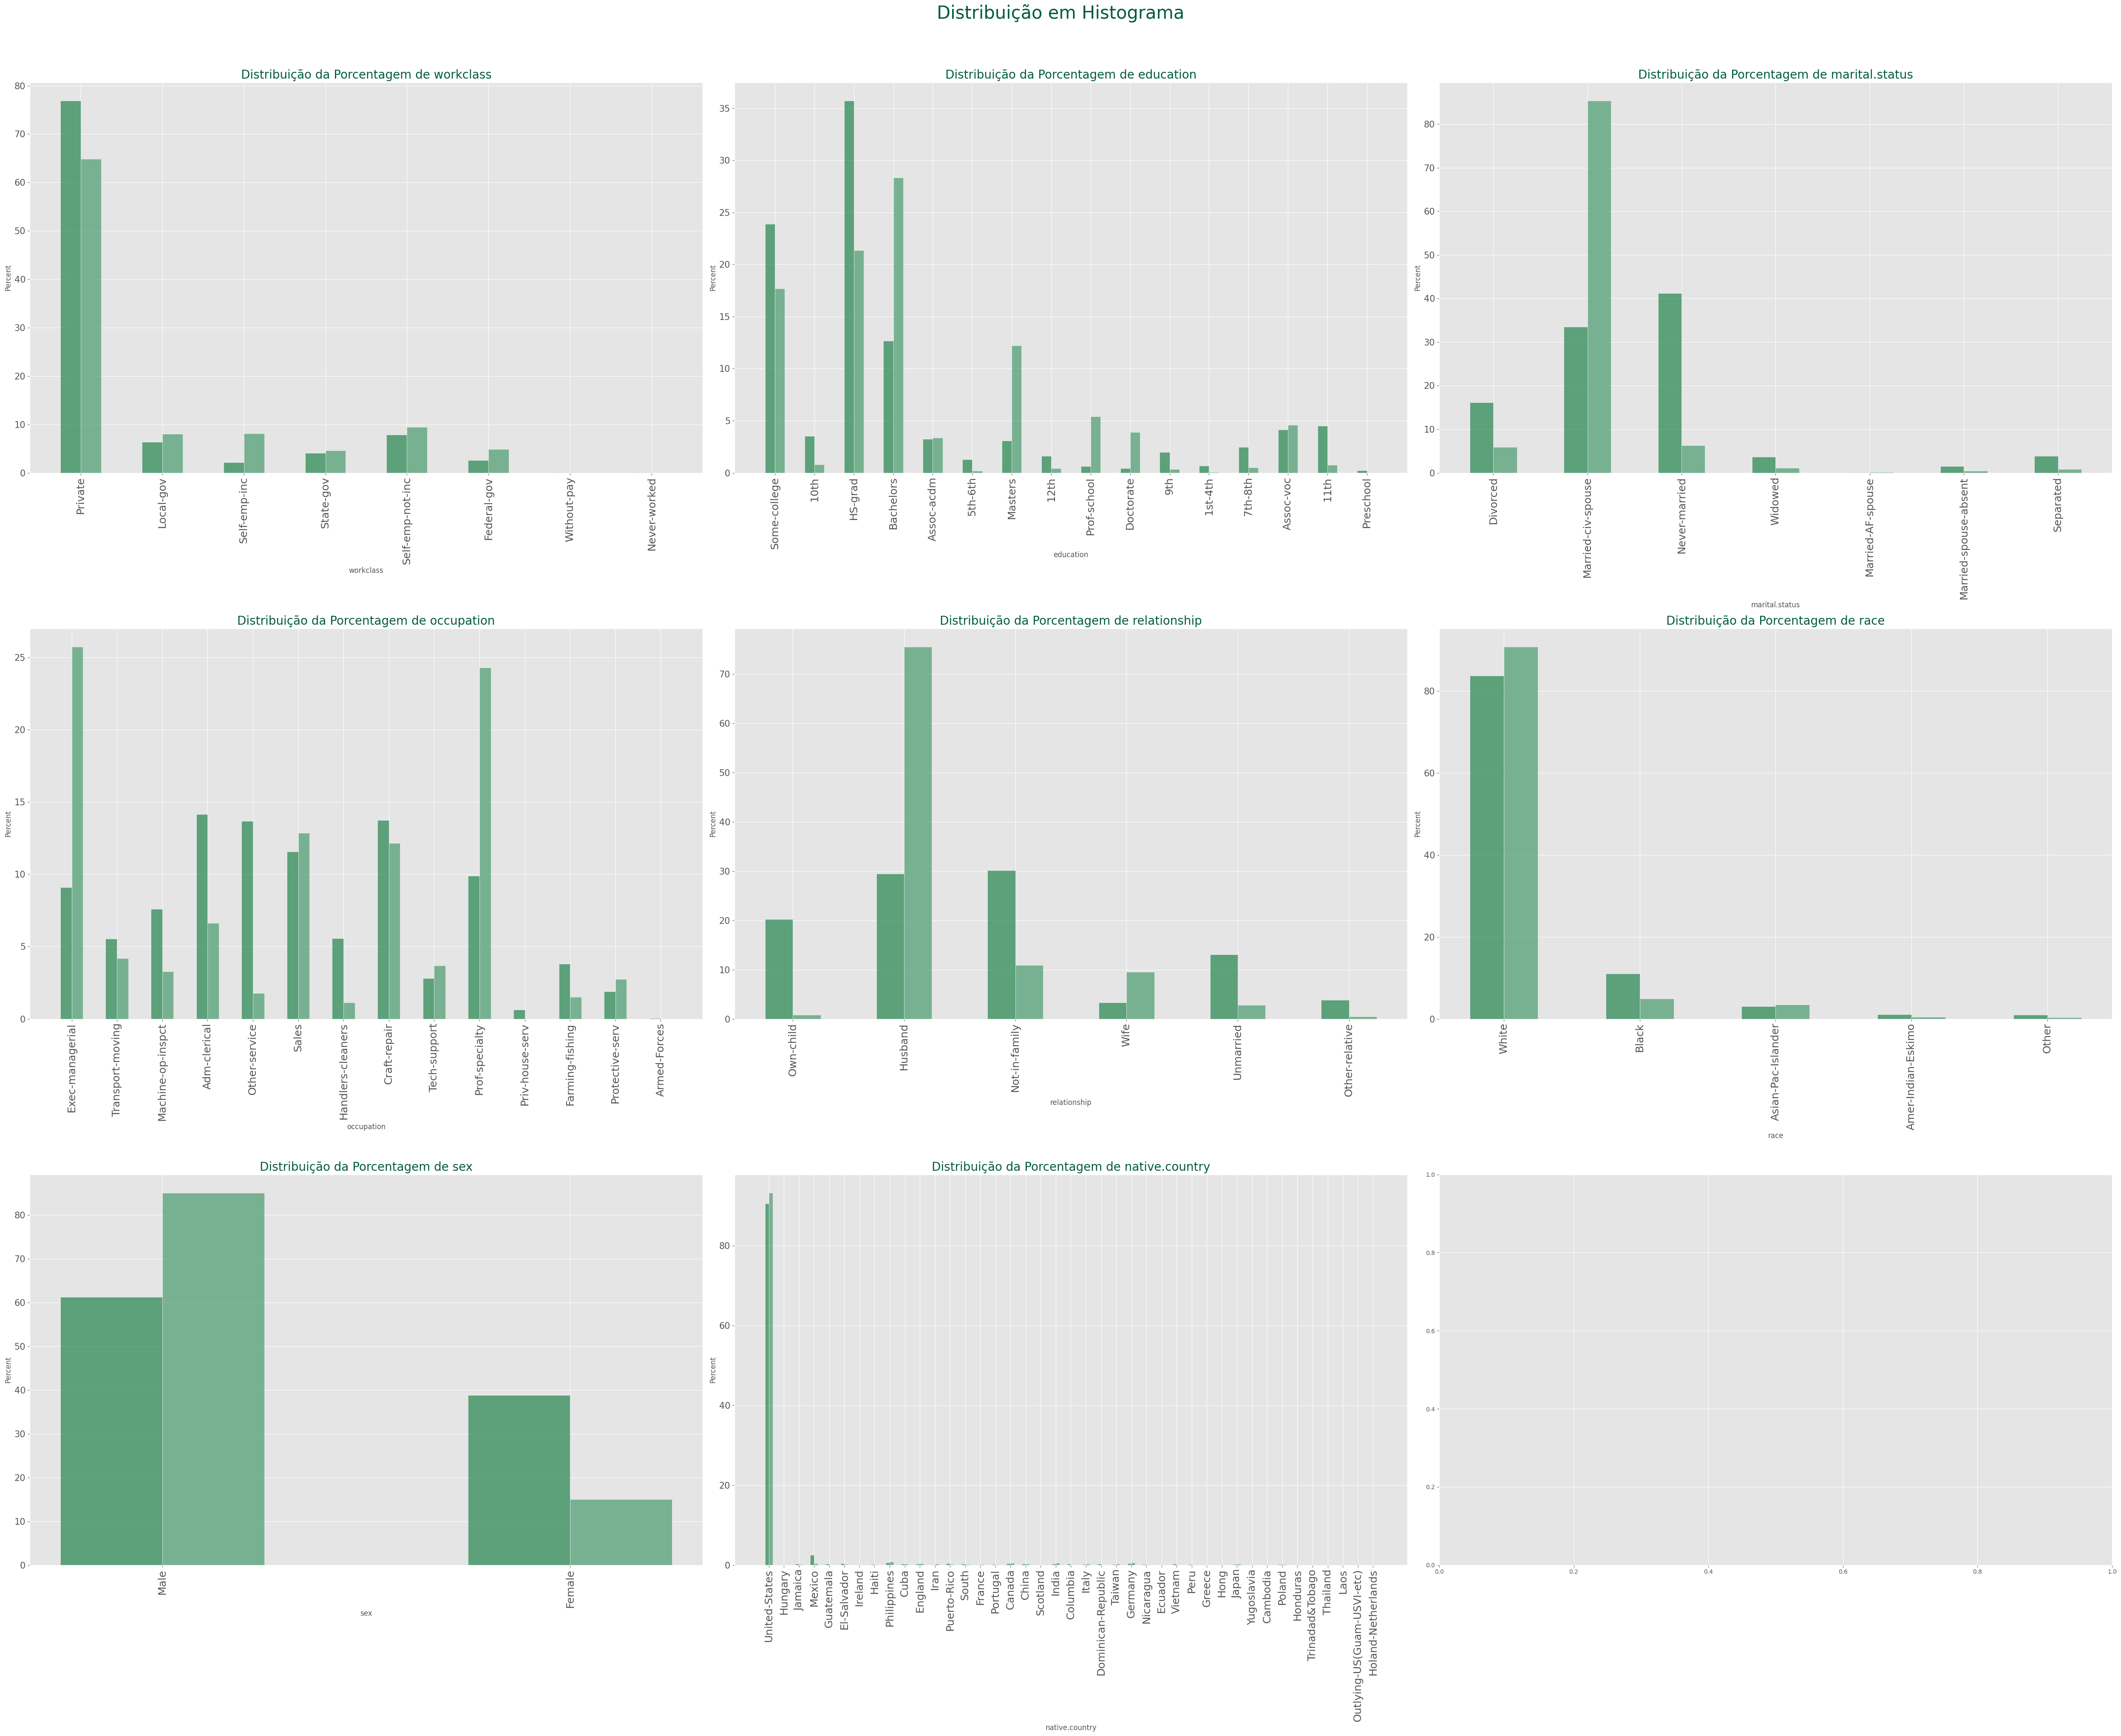

In [25]:
DistribuicaoHistogramaTarget(dados_treino, 'income')

## Missing Values, Outliers, Normalização e Encoding

### Setagem de Dados Resultantes

In [26]:
data_base = pd.DataFrame()

### Missing Values

Em estatística, missing values é um conceito associado a toda e qualquer falha na obtenção de respostas (observações) sobre os elementos seleccionados e designados para pertencerem à amostra. Qualquer estudo feito por Estudo por amostragem está sujeito a vários erros. Os erros provenientes do próprio mecanismo de aleatorização utilizado, ditos erros de amostragem, são os únicos conhecidos à partida e sem remédio possível. Os erros provenientes de não-repostas estão incluídos na categoria dos erros provenientes da não-observação que, obviamente, não dependem directamente do tipo de amostragem. 

Assim, é necessário tratá-los para não interferirem na predição posterior

#### Numéricos Faltantes

Recebe um dataframe  
Verifica quantos dados faltantes cada atributo numérico possui

In [27]:
def NumericosFaltantes(df):
    # Seleciona as colunas numéricas do DataFrame
    numerical_data = df.select_dtypes(include=np.number)
    
    # Conta os valores NaN em cada coluna numérica
    nan_count = numerical_data.isna().sum()
    
    # Exibe o resultado
    display(nan_count)

In [28]:
NumericosFaltantes(dados_treino)

age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

Verifique que não há nenhum dado numérico ausente. Assim, não precisamos tratar esses caso de dados.

#### Categóricos Faltantes

Recebe um dataframe  
Verifica quantos dados faltantes cada atributo categórico possui

In [29]:
def CategoricosFaltantes(df):
    # Seleciona as colunas numéricas do DataFrame
    categorical_data = df.select_dtypes(include=['object', 'category'])
    
    # Conta os valores NaN em cada coluna numérica
    nan_count = categorical_data.isna().sum()
    
    # Exibe o resultado
    display(nan_count)

In [30]:
CategoricosFaltantes(dados_treino)

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

Aqui, há uma porcentagem considerável de dados faltantes para workclass, occupation e native.country

Para não alterar a estrtura das correlações, poderíamos descartar os dados. Contudo, isso seria problemático para o Kaggle.

Assim, vamos substituí-los por 'desconhecido'.

#### Missing Values

Modelado conforme observação anterior, essa função recebe um dataset  
Faz o processamento discutido anteriormente e retorna um novo dataset

In [31]:
def MissingValues(df):
    # Seleciona as colunas numéricas do DataFrame
    numerical_data = df.select_dtypes(include=np.number)
    categorical_data = df.select_dtypes(include=['object', 'category'])

    # Dataset de retorno
    novoDf = pd.DataFrame()
    
    # Faz o processamento numérico
    for coluna in numerical_data:
        novoDf[coluna] = df[coluna]

    # Faz o processamento categórico
    for coluna in categorical_data:
        novoDf[coluna] = df[coluna].replace('?', 'desconhecido')
        novoDf[coluna] = df[coluna].replace(np.nan, 'desconhecido')

    return novoDf

### Outliers

Outliers são dados que se diferenciam dos demais. Isso pode ser visto pela escala dos dados ou frequência.

Podem ser oriundos de erros de medição. Mas, evidenciam pontos que não seguem os padrões vistos pelos demais. Contudo, isso pode distorcer as estatísticas dos demais dados e, portanto, precisam ser tratados.

Outliers é como o efeito borboleta: se não bem tratado, pode se propagar e ocasionar problemas ou anormalias.

#### Age

Pelas nossas análises anteriores, o atributo "Age" possui

1. **Média:** 38.58
2. **Desvio Padrão:** 13.64
3. **Min:** 17
4. **25%:** 28
5. **Mediana:** 37
6. **75%** 48
7. **Max:** 90

Não possui Missing Values

1. Apresenta dados pouco representativos a partir de 76 anos.
2. Para aqueles que recebem <=50K, os outliers começam em 78 anos e os que recebem >50K, a partir dos 72 anos.
3. A densidade dos dados se dá entre os 20 e os 30 anos.
4. O gráfico é bem distribuído.

#### Estratégia:

1. O uso de uma tendência central para cubir os outliers é desencorajado.
2. Vamos reagrupar os dados por faixa etária. Dada a distribuição apresentada, vamos fazer a seguinte distribuição
['<=25', '25-32', '32-40', '40-50', '50+']

Na coluna abaixo, verifique que os valores acima de 80 anos estão fragmentados e pouco significativos. Logo é interessante rearranjá-los numa superclasse.

In [32]:
def AgeOutliers(data):
    # age
    for i in data:
        data.loc[(data['age'] > 16) & (data['age'] <= 25), 'age'] = 1
        data.loc[(data['age'] > 25) & (data['age'] <= 32), 'age'] = 2
        data.loc[(data['age'] > 32) & (data['age'] <= 40), 'age'] = 3
        data.loc[(data['age'] > 40) & (data['age'] <= 50), 'age'] = 4
        data.loc[data['age'] > 50, 'age'] = 5
    return data

#### Fnlwgt (***)

Pelas nossas análise anteriores, o atributo "Fnlwgt" possui

1. **Média:** 1.897818e+05
2. **Desvio Padrão:** 1.055498e+05
3. **Min:** 1.228500e+04
4. **25%:** 1.178315e+05
5. **Mediana:** 1.783630e+05
6. **75%:** 2.370545e+05
7. **Max:** 1.484705e+06

Não possui Missing Values

1. Outliers aparecem em ambas as categorias. Contudo, verifica-se que a média é próxima da mediana. Logo, pontos sensíveis são alguns poucos outliers.

2. A relação quanto ao target parece ser independente, conforme os boxplots. Assim, vamos eliminar essa variável.

#### Education Number

Pelas nossas análises anteriores, o atributo "Education.num" possui

1. **Média:** 10.08
2. **Desvio Padrão:** 2.57
3. **Min:** 1
4. **25%:** 9
5. **Mediana:** 10
6. **75%:** 12
7. **Max:** 16

Não possui Missing values

1. Outliers aparecem em ambas categorias. Contudo, verifica-se uma tendência de maiores salários para os que possuem maior escolaridade.

#### Capital Gain

Pelas nossas análises anteriores, o atributo "Capital Gain" possui

1. **Média:** 1077.61
2. **Desvio Padrão:** 7385.40
3. **Min:** 0
4. **25%:** 0
5. **Mediana:** 0
6. **75%:** 0
7. **Max:** 99999

Não possui Missing values

1. Apresenta outliers concentrados.
2. Para aqueles que recebem <=50K, os outliers são bem mais concentrados à tendência central dos dados.
3. O gráfico é extremamente denso em 0 para <=50K.
4. O desvio padrão é extremamente alto e a média é deslocada em relação à mediana. Portanto, a média é inútil nessa situação.
5. Apesar de não ser tão denso como os que recebem <=50K, aqueles que recebem >50K também possuem alguma concentração perto ao zero.

#### Estratégia:

1. Como boa parte dos dados se concentra em zero, vamos aplicar uma transformação logarítmica para dar menos influência de outliers sobre os nosso dados

2. Vamos fazer uma combinação linear com Capital Loss para reduzir dimensionalidade

#### Capital Loss

Pelas nossas análises anteriores, o atributo "Capital Loss" possui

1. **Média:** 87.30
2. **Desvio Padrão:** 402.96
3. **Min:** 0
4. **25%:** 0
5. **Mediana:** 0
6. **75%:** 0
7. **Max:** 4356

Não possui Missing values

1. Apresenta a medida central mais concentrada, com outliers mais próximos.
2. Para aqueles que recebem menos do que 50K, há uma distribuição mais esparsa, porém, próxima a 0.
3. Por outro lado, para os mais ricos, há uma maior concentração em torno da mediana.

#### Estratégia:

1. Como boa parte dos dados se concentra em zero, vamos aplicar uma transformação logarítmica para dar menos influência de outliers sobre os nosso dados

2. Vamos fazer uma combinação linear com Capital Gain para reduzir dimensionalidade

In [33]:
def GainLossOutliers(df):
    novoDf = df.copy()
    novoDf['capital_diff'] = abs((df['capital.gain'] - df['capital.loss']))
    novoDf['capital_diff'] = np.log(novoDf['capital_diff'] + 1)

    # Remover as colunas 'capital.gain' e 'capital.loss'
    novoDf = novoDf.drop(columns=['capital.gain', 'capital.loss'])
    return novoDf

#### Processamento Final

Assim, a função Outliers, recebe um dataset e faz o processamento sobre age, capital gain e loss.

In [34]:
def Outliers(df):
    novoDf = df.copy()
    novoDf = AgeOutliers(novoDf)
    novoDf = GainLossOutliers(novoDf)

    return novoDf

### Encoding

É uma técnica simples e eficiente que mapeia cada categoria para um valor numérico único. Ele é frequentemente usado em tarefas de classificação binária ou regressão, onde o objetivo é transformar as categorias em valores que possam ser facilmente processados pelos algoritmos de machine learning.

Podemos aplicar One-Hot Enconding (aumenta a dimensionalidade, mas, não exige ordem das classes) ou o Label Encoding (exige que as classes tenham um certo grau hierárquico).

Assim, conseguimos processar os dados categóricos também.

Inicialmente, vamos dar Label Enconding em Education e One-Hot Enconding nos demais. Então, tomamos algumas notas com matrizes de correlação.

### Dos Dados Anteriores

Primeiramente, vamos tratar o atributo education com label enconding. 

Então, de native.country, em razão da massiva expressão estadunidense (mais de 80% dos dados), vamos transformar em um one hot da forma: EUA:1, outros:0. Isso previne overfitting sobre dados pouco amostrados.

A seguir, transformar 1:homens, 0:mulheres, tal como em income. Apenas para reduzir dimensionalidade dos dados e previnir overfitting.

In [35]:
def Encoding(df, one_hot = True):
    # Dataset de retorno
    novoDf = df.copy()

    categorical_data = df.select_dtypes(include=['object', 'category'])
    numerical_data = df.select_dtypes(include=np.number)

    # Inicializando o LabelEncoder
    label_encoder = LabelEncoder()

    if one_hot:
        for col in categorical_data.columns:
            if col == 'education':
                # Definindo a ordem para a variável 'Education'
                novoDf['education'] = df['education'].apply(lambda x: 'School' if x == '11th' or x == '7th-8th' or x == '10th' 
                                                  or x == '5th-6th' or x == '9th' or x == '12th' or x == '1st-4th' 
                                                  or x == 'Preschool' else x)
                novoDf['education'] = df['education'].apply(lambda x: 'Associate' if x == 'Assoc-acdm' or x == 'Assoc-voc' else x)
                education_map = {'School':1,
                             'HS-grad':2,
                             'Some-college':3,
                             'Bachelors':4,
                             'Prof-school':5,
                             'Associate':6,
                             'Masters':7,
                             'Doctorate':8}
                novoDf['education'] = novoDf['education'].map(education_map)
                
            elif col == 'native.country':
                novoDf['native.country'] = df['native.country'].apply(lambda x: 0 if x != 'United-States' else 1)
            
            elif col == 'income':
                novoDf['income'] = novoDf['income'].map({'<=50K': 0, '>50K': 1})
    
            elif col == 'sex':
                novoDf['sex'] = novoDf['sex'].map({'Female': 0, 'Male': 1})
            
            else:
                # Aplicando One-Hot Encoding para outras variáveis categóricas
                novoDf = pd.get_dummies(novoDf, columns=[col])
            
    else:
        for col in categorical_data.columns:
            if col == 'education':
                # Definindo a ordem para a variável 'Education'
                novoDf['education'] = df['education'].apply(lambda x: 'School' if x == '11th' or x == '7th-8th' or x == '10th' 
                                                  or x == '5th-6th' or x == '9th' or x == '12th' or x == '1st-4th' 
                                                  or x == 'Preschool' else x)
                novoDf['education'] = df['education'].apply(lambda x: 'Associate' if x == 'Assoc-acdm' or x == 'Assoc-voc' else x)
                education_map = {'School':1,
                             'HS-grad':2,
                             'Some-college':3,
                             'Bachelors':4,
                             'Prof-school':5,
                             'Associate':6,
                             'Masters':7,
                             'Doctorate':8}
                novoDf['education'] = novoDf['education'].map(education_map)
                
            elif col == 'native.country':
                novoDf['native.country'] = df['native.country'].apply(lambda x: 0 if x != 'United-States' else 1)
            
            elif col == 'income':
                novoDf['income'] = novoDf['income'].map({'<=50K': 0, '>50K': 1})
    
            elif col == 'sex':
                novoDf['sex'] = novoDf['sex'].map({'Female': 0, 'Male': 1})
            
            else:
                # Aplicando One-Hot Encoding para outras variáveis categóricas
                novoDf = df[coluna]

    # Faz o processamento numérico
    for coluna in numerical_data:
        novoDf[coluna] = df[coluna]

    return novoDf

### Normalização

Normalização refere-se ao processo de ajuste de valores medidos em escalas diferentes para uma escala comum.

Assim, apesar das grandezas distintas, conseguimos encontrar correlações entre os dados

Nessa parte do EP, vamos utilizar o método da normalização para a distribuição Normal.

In [36]:
def Normalização(data):
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(data)

    return data

### Amostra para Análise da Relação entre Variáveis

In [37]:
sample_Data = MissingValues(dados_treino)
sample_Data = Outliers(sample_Data)
sample_Data = Encoding(sample_Data)
sample_Data = Normalização(sample_Data)

## Relações Entre Variáveis

Como possível visualizar abaixo, pelo scatterplot:

1. 'education.num' e 'education' são correlacionados, apresentado uma correlação de 0.84. Para redução da dimensionalidade, vamos manter só o primeiro.

2. 'marital.status' e 'relationship' também são fortemente correlacionados. Vamos, manter o primeiro, para reduzir a dimensionalidade, pois o outro também é correlacionado com 'sex'.

#### Scatter Plot Correlação

Recebe um dataset, uma paleta (padrão, sns.diverging_palette(145, 300, s=60, as_cmap=True)) e um cor para título ('#008b73')  
Faz a plotagem da correlação


In [38]:
def ScatterPlotCorrelacao(df, paleta=sns.diverging_palette(145, 300, s=60, as_cmap=True), cor = '#008b73'):
    novoDf = Encoding(dados_treino)

    correlation_matrix = novoDf.corr()  # Calcula a matriz de correlação
    
    # Cria o mapa de correlação com Seaborn
    plt.figure(figsize=(novoDf.shape[1]*1.5, novoDf.shape[1]*1.5))  # Define o tamanho da figura
    sns.heatmap(correlation_matrix, annot=True, cmap=paleta, fmt='.2f', linewidths=0.5, annot_kws={"size": 13})
    
    # Ajustar o tamanho da fonte dos eixos
    plt.xticks(fontsize=novoDf.shape[1]*0.4, color=cor)  # Tamanho da fonte para os rótulos do eixo X
    plt.yticks(fontsize=novoDf.shape[1]*0.4, color=cor)  # Tamanho da fonte para os rótulos do eixo Y
    
    # Exibe o gráfico
    plt.title('Mapa de Correlação', color=cor, fontsize=novoDf.shape[1]*0.85)
    plt.show()

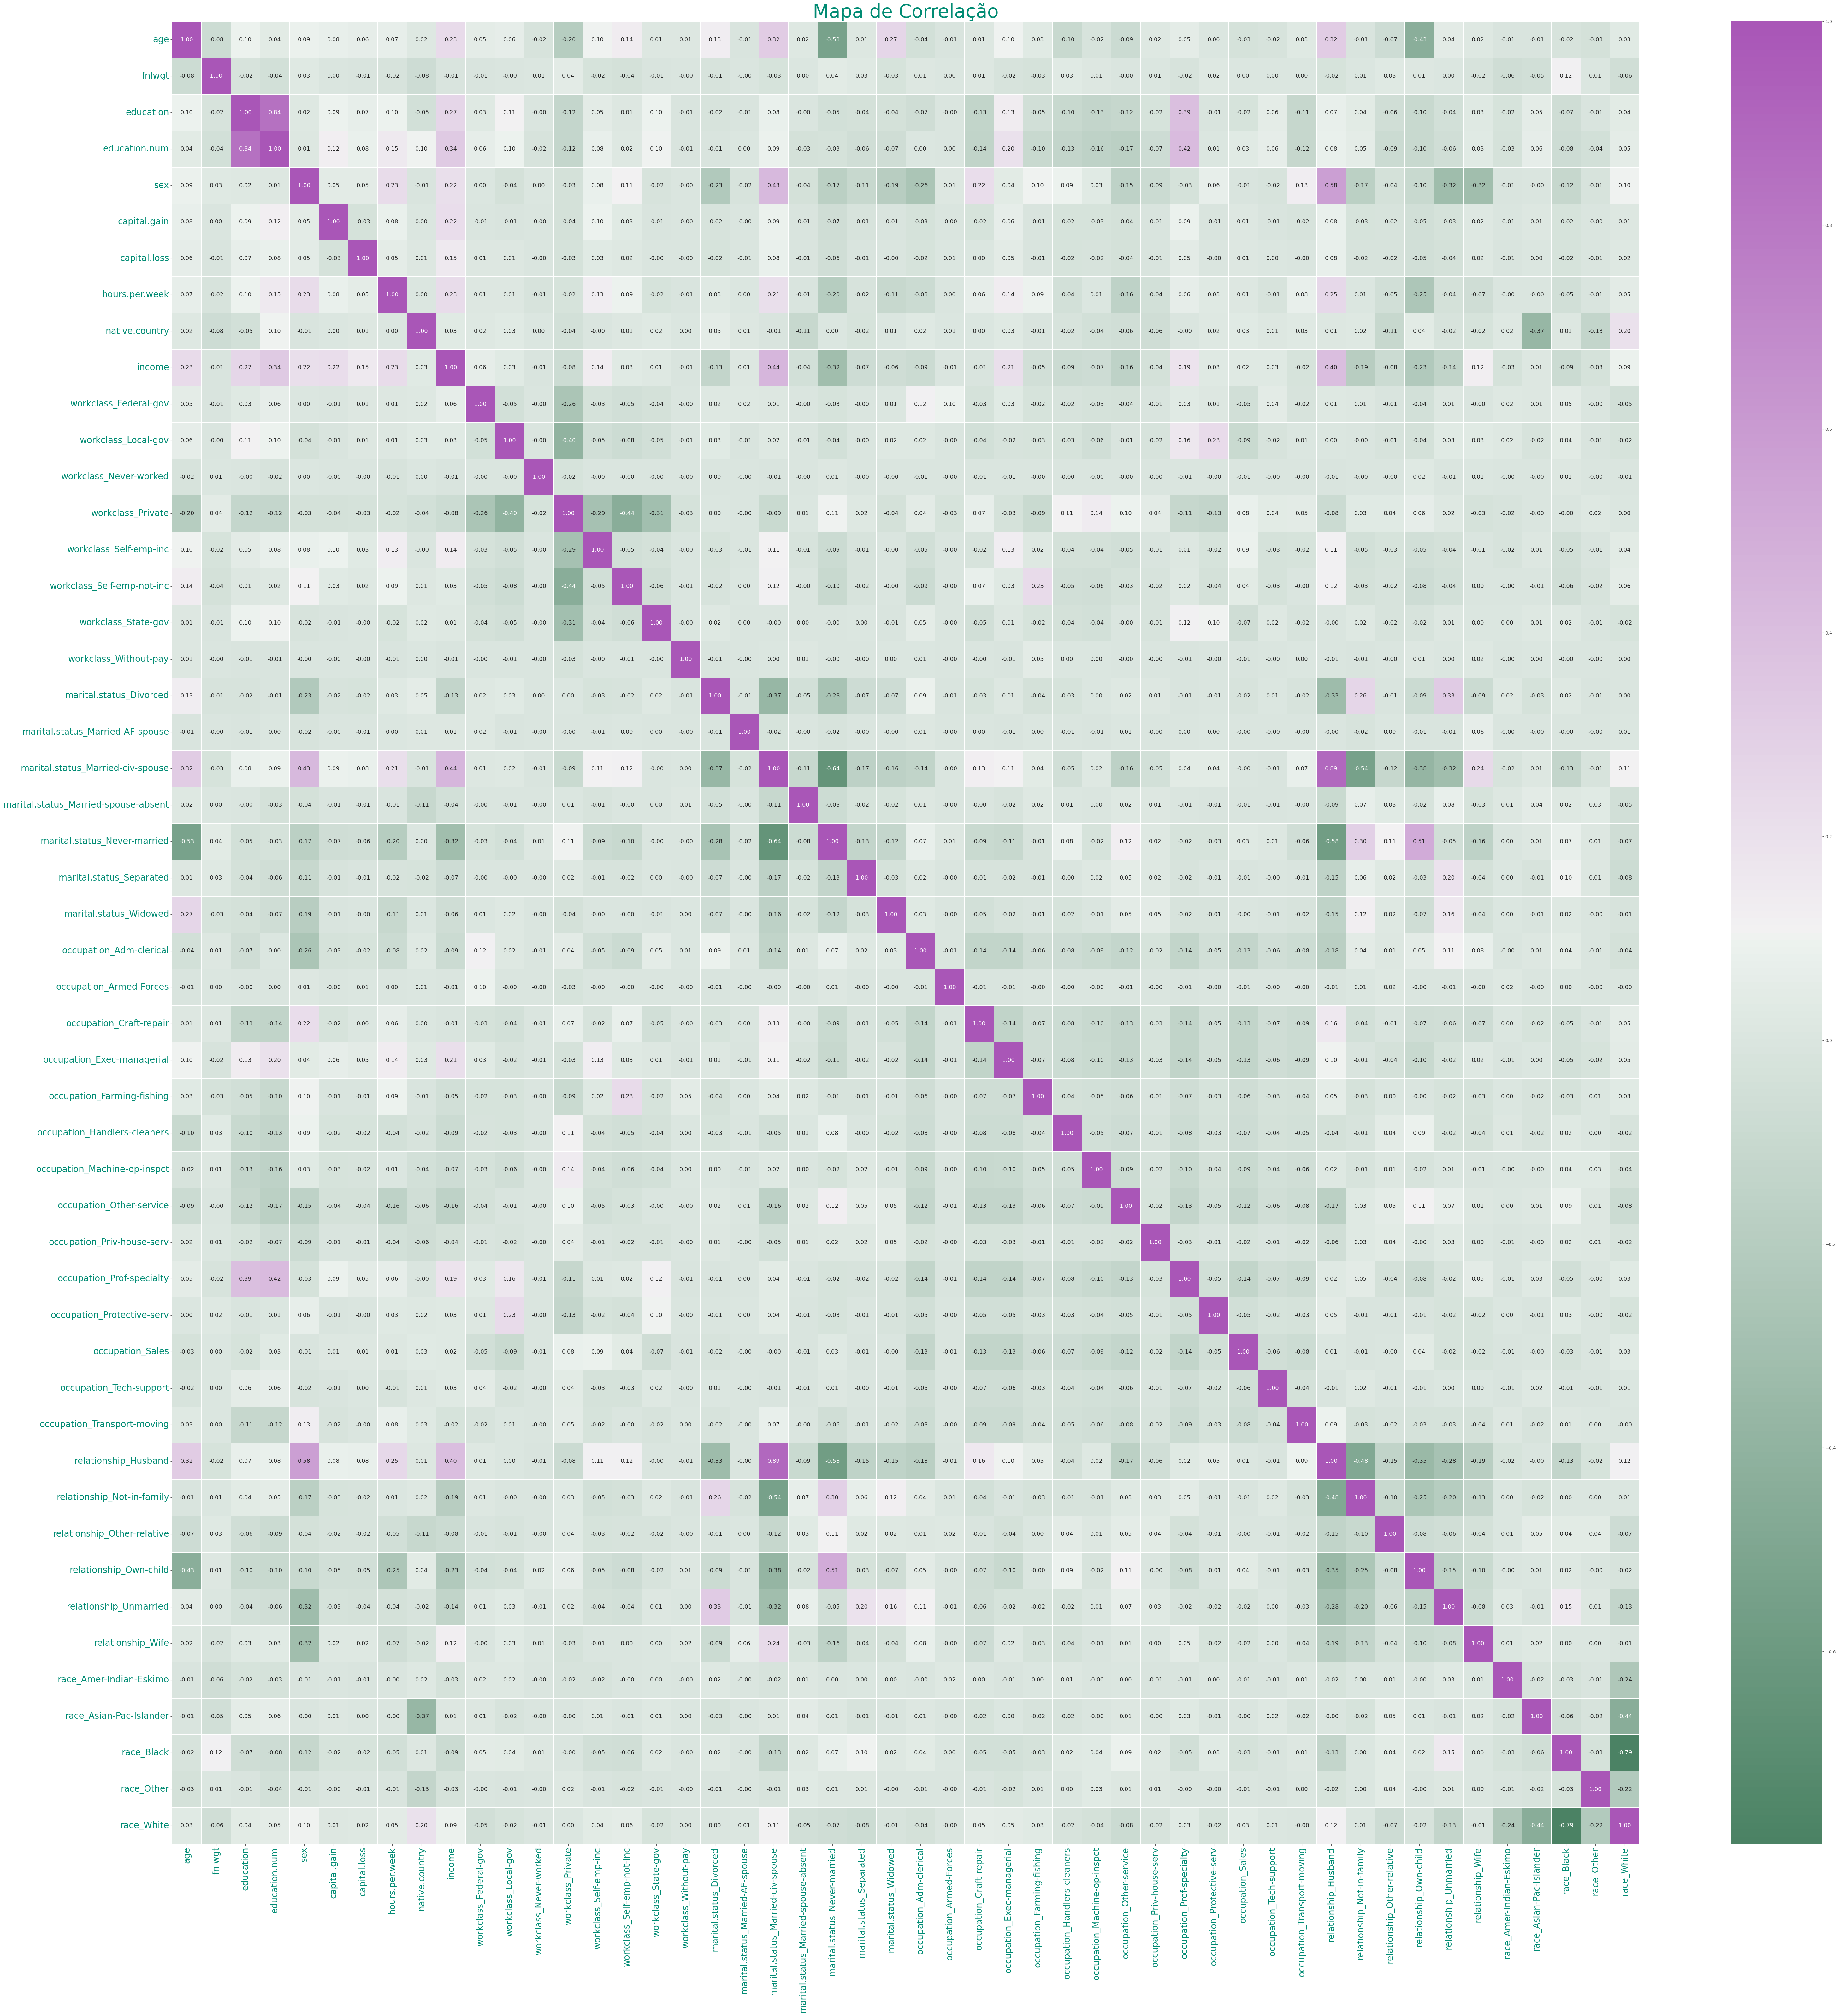

In [39]:
ScatterPlotCorrelacao(sample_Data)

In [40]:
def PairPlot(df, paleta="viridis", cor='#150020'):
    # Selecionar automaticamente as colunas numéricas
    atributos = df.select_dtypes(include=['number']).columns
    n = len(atributos)
    
    fig, axes = plt.subplots(n, n, figsize=(5 * n, 5 * n))  # Grid com subplots

    for i, var1 in enumerate(atributos):
        for j, var2 in enumerate(atributos):
            ax = axes[i, j]

            if i == j:  # Gráficos de densidade (diagonal principal)
                sns.histplot(df[var1], kde=True, ax=ax, color=cor)
                ax.set_title(f'Distribuição de {var1}', fontsize=12, color=cor)
            else:  # Scatter plots para as demais combinações
                sns.scatterplot(data=df, x=var2, y=var1, hue='income', palette=paleta, ax=ax, s=20)

            # Ajustes visuais
            if j == 0:
                ax.set_ylabel(var1, fontsize=10)
            else:
                ax.set_ylabel("")
                
            if i == n - 1:
                ax.set_xlabel(var2, fontsize=10)
            else:
                ax.set_xlabel("")
                
            ax.tick_params(axis='x', labelsize=8)
            ax.tick_params(axis='y', labelsize=8)

    # Ajuste geral do grid
    plt.tight_layout()
    fig.suptitle('PairPlot Grid', color=cor, fontsize=20)
    plt.subplots_adjust(top=0.95)  # Espaço para o título geral
    plt.show()

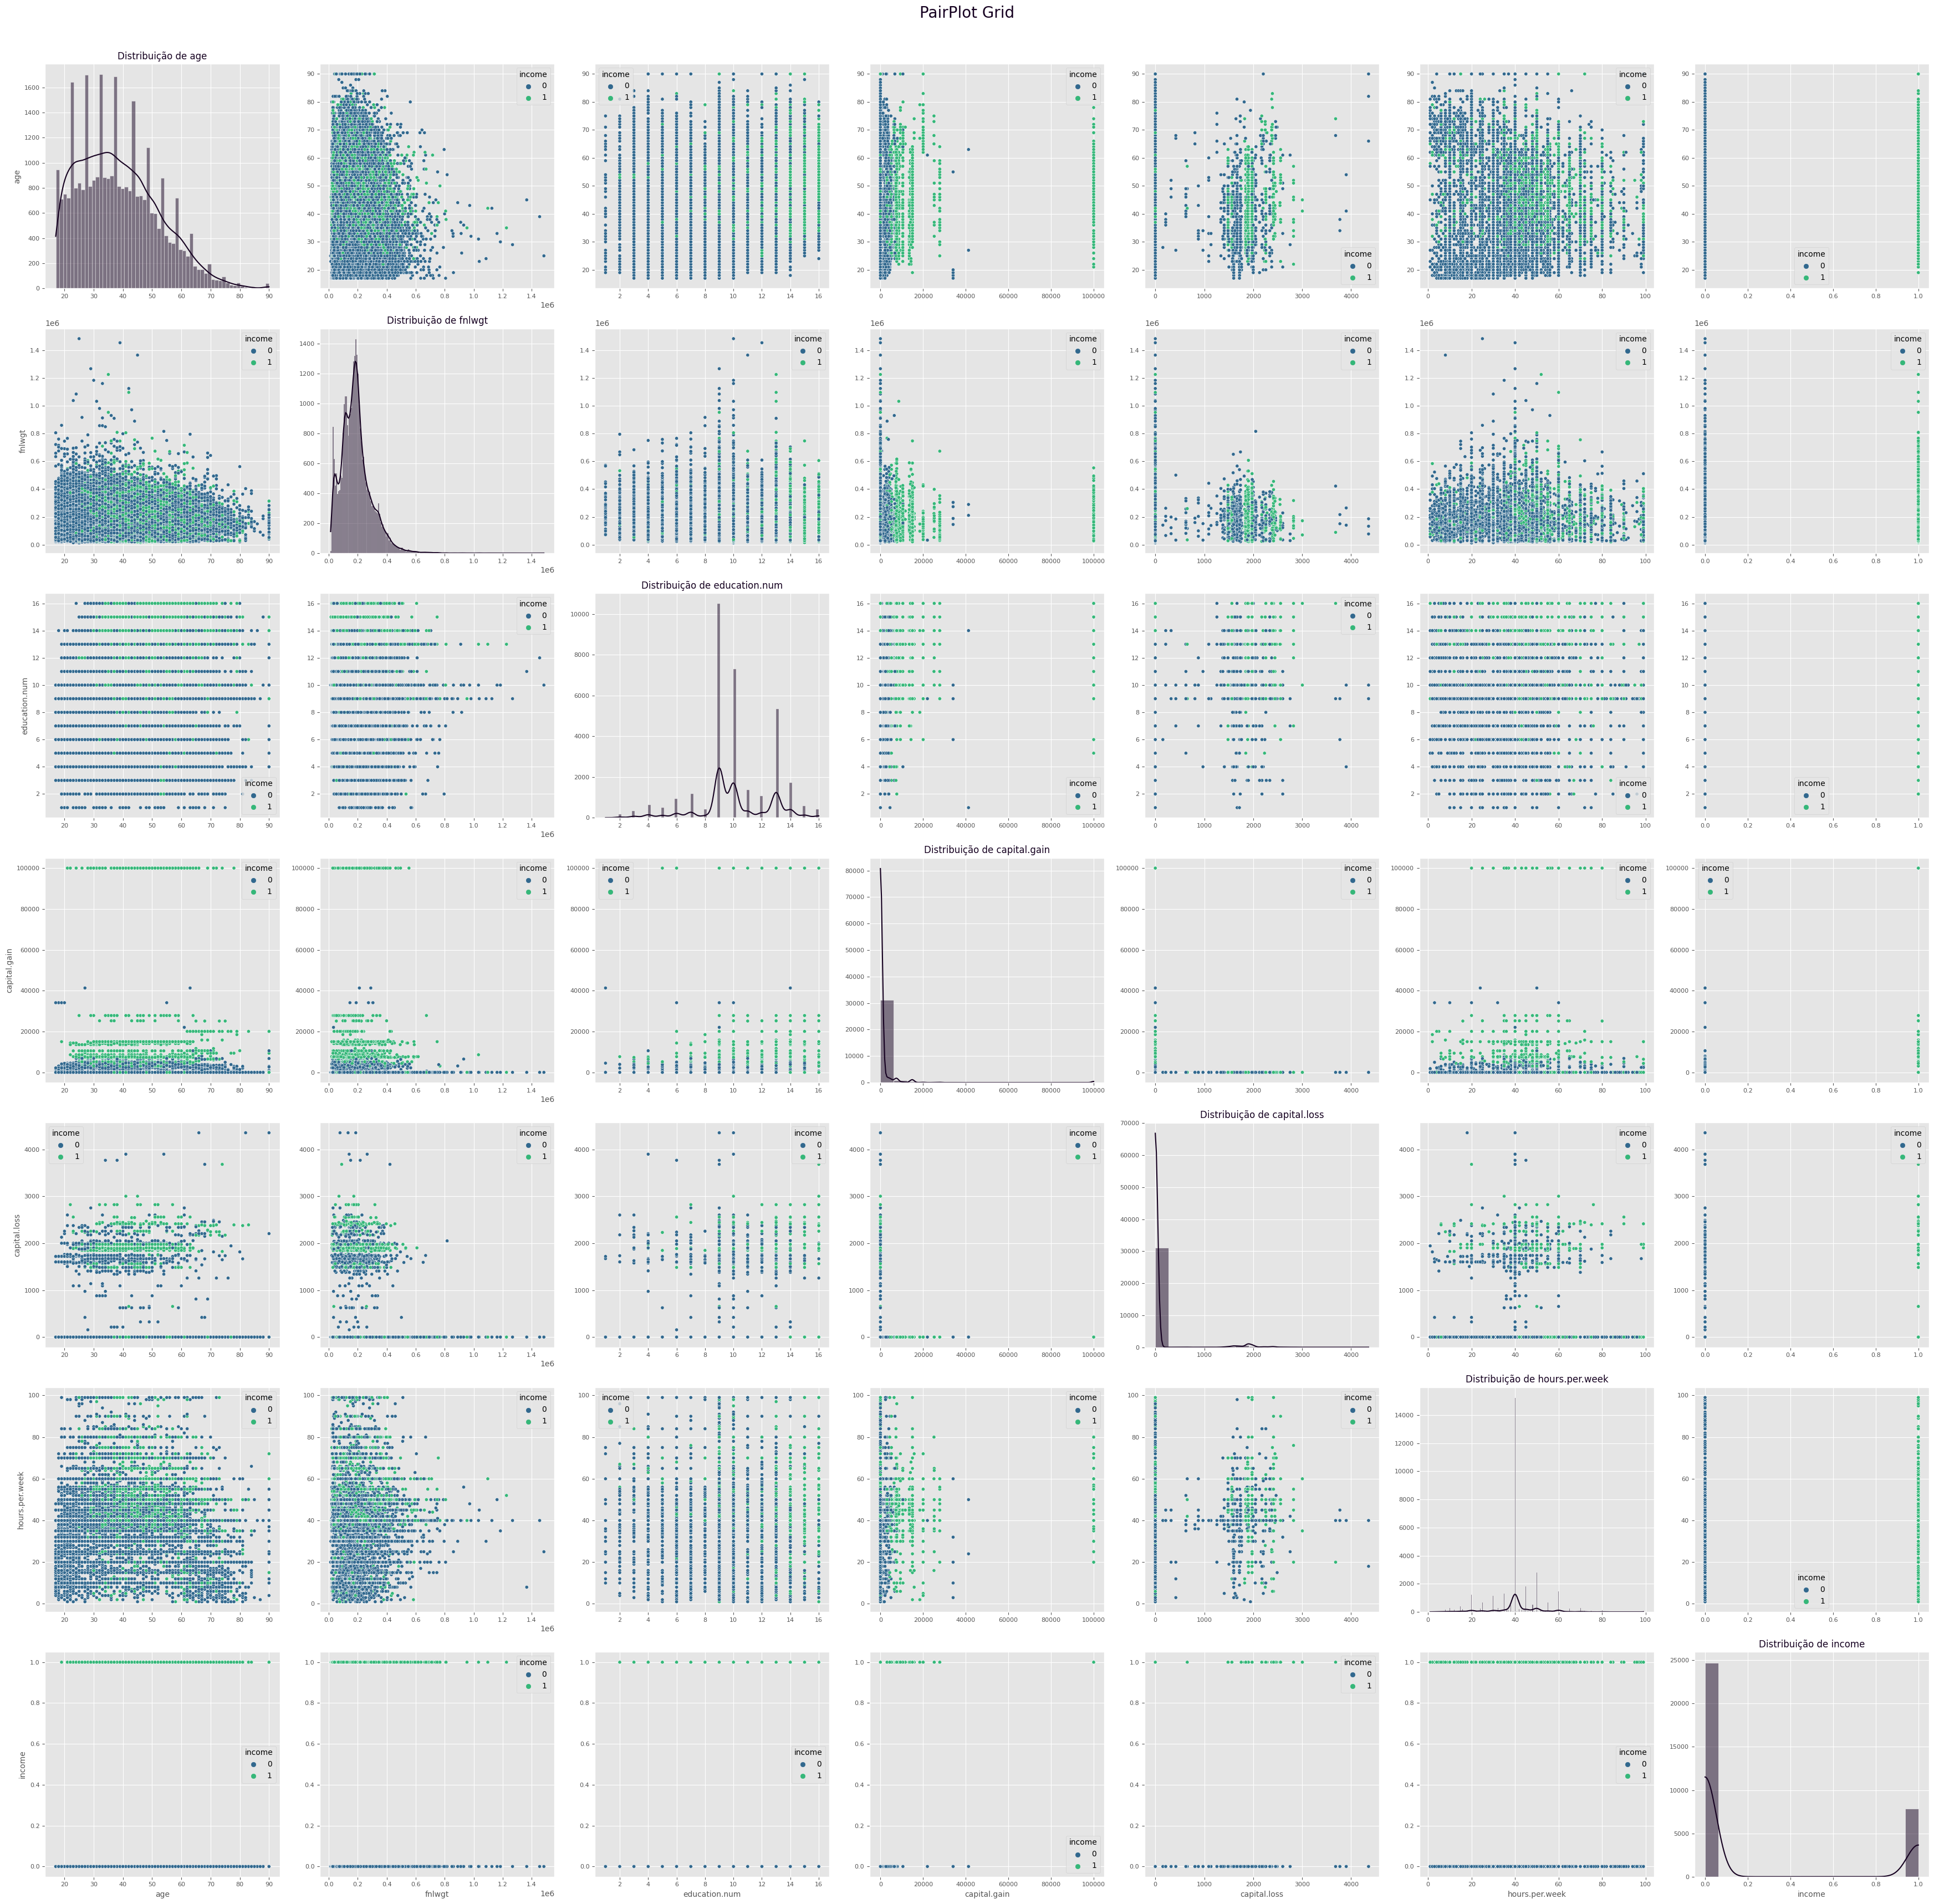

In [41]:
numerical_data = dados_treino.select_dtypes(include=['number'])
numerical_data['income'] = dados_treino['income']
PairPlot(Normalização(Encoding(numerical_data)))

# Modelagem

## Setagem do Dataset

A partir das observações anteriores prévias, vamos fazer a seleção de atributos e processamento de dados

In [42]:
X_treino_bruto = dados_treino[['age', 'workclass', 'education.num', 'marital.status', 'occupation', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income']]
X_teste_bruto = dados_teste[['age', 'workclass', 'education.num', 'marital.status', 'occupation', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']]

X_treino = MissingValues(X_treino_bruto)
X_treino = Outliers(X_treino)
X_treino = Encoding(X_treino)
X_treino = Normalização(X_treino)

X_teste = MissingValues(X_teste_bruto)
X_teste = Outliers(X_teste)
X_teste = Encoding(X_teste)
X_teste = Normalização(X_teste)

### Subdivisão em Validation Data e Train Data

In [43]:
X_train, X_val, Y_train, Y_val = train_test_split(X_treino.drop('income',axis=1),
                                                  X_treino['income'], 
                                                  train_size=0.75, 
                                                  random_state=SEED
                                                 )

In [44]:
Y_train.head()

14341    0
30037    0
29086    1
25942    0
22097    0
Name: income, dtype: int64

## Modelo Preditivo, Eu Escolho Você

Nessa etapa do EP, vamos selecionar 4 modelos preditivos que aprendemos durante o semestre.

Como discutido em aula, alguns modelos interessantes são o SVM, a Regressão Logística, Random Forest e AdaBoost.

### Descrição dos Modelos

*SVM:* O algoritmo SVM, ou Support Vector Machine, é um algoritmo de aprendizado de máquina supervisionado que pode ser usado para problemas de classificação e regressão. Ele é baseado na ideia de encontrar um hiperplano que melhor separe os dados em diferentes classes. 

*Regressão Logística:* A regressão logística é uma técnica de análise de dados que usa matemática para encontrar as relações entre dois fatores de dados. Em seguida, essa relação é usada para prever o valor de um desses fatores com base no outro. A previsão geralmente tem um número finito de resultados, como sim ou não. Melhor que LDA ou QDA, pois não se baseia em suposições de probabilidades.

*Random Forest:* O Random Forest irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final, em uma espécie de votação. Reduz o overfitting causado em Árvores de Decisão.

*AdaBoost:* AdaBoost é uma técnica de ensemble learning que visa reduzir o overfitting ao combinar múltiplos modelos fracos. É comumente utilizado em conjunto com algoritmos base, sendo as árvores de decisão uma escolha popular.

### Simply The Best: Busca dos Hiperparâmetros

Vamos usar o Grid Search CV para facilitar essa busca exaustiva

#### SVM

Vamos fazer uma busca exaustiva de hiperparâmetros:
C |
|:-: |
{0.001, 0.005, 0.01, 0.05, 0.1, 0.5}

Com auxílio do GridSearchCV, temos os seguintes resultados:

Os melhores parâmetros: {'C': 0.05}

Com as métricas

Acurácia | Precisão | Revocação | F1 | Erro Empírico
:-: | :-: | :-: | :-: | :-: 
0.8490 | 0.7997 | 0.7626 | 0.7781 | 0.1510

Uma acurácia razoável, mas, que tende a pesar a revocação, com falsos negativos

In [45]:
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

SVM = LinearSVC()

BestSVM = GridSearchCV(SVM, param_grid, verbose = 3) 
BestSVM.fit(X_train, Y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................C=0.001;, score=0.837 total time=   0.3s
[CV 2/5] END ...........................C=0.001;, score=0.836 total time=   0.3s
[CV 3/5] END ...........................C=0.001;, score=0.833 total time=   0.6s
[CV 4/5] END ...........................C=0.001;, score=0.829 total time=   0.3s
[CV 5/5] END ...........................C=0.001;, score=0.831 total time=   0.3s
[CV 1/5] END ...........................C=0.005;, score=0.850 total time=   1.2s
[CV 2/5] END ...........................C=0.005;, score=0.842 total time=   1.2s
[CV 3/5] END ...........................C=0.005;, score=0.835 total time=   1.2s
[CV 4/5] END ...........................C=0.005;, score=0.839 total time=   1.2s
[CV 5/5] END ...........................C=0.005;, score=0.842 total time=   1.2s
[CV 1/5] END ............................C=0.01;, score=0.851 total time=   1.2s
[CV 2/5] END ............................C=0.01;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}, verbose=3)

##### Avaliações

In [46]:
# Os melhores Parâmetros
print(BestSVM.best_params_) 
  
# O melhor estimador 
print(BestSVM.best_estimator_) 

grid_predictions = BestSVM.predict(X_val) 
  
# Então, a análise final
print(classification_report(Y_val, grid_predictions)) 

{'C': 0.05}
LinearSVC(C=0.05)
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6209
           1       0.69      0.65      0.67      1931

    accuracy                           0.85      8140
   macro avg       0.79      0.78      0.78      8140
weighted avg       0.84      0.85      0.84      8140



Métricas

Acurácia: 0.8461
Precisão: 0.7891
Revocação: 0.7780
F1: 0.7832
Erro Empírico: 0.1539



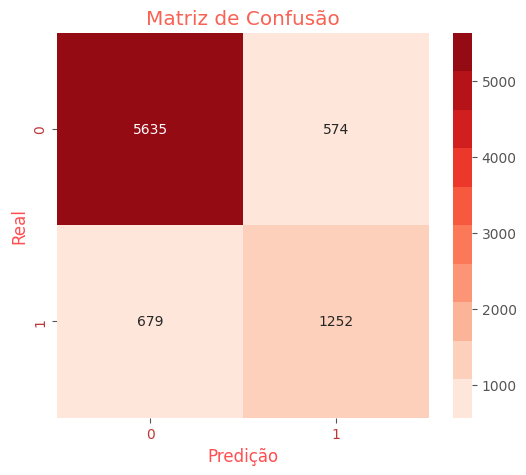

In [47]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(Y_val, grid_predictions)
precision_macro = precision_score(Y_val, grid_predictions, average='macro')
recall_macro = recall_score(Y_val, grid_predictions, average='macro')
f1_macro = f1_score(Y_val, grid_predictions, average='macro')

cm = confusion_matrix(Y_val, grid_predictions)

# Impressões
print('Métricas\n')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision_macro:.4f}')
print(f'Revocação: {recall_macro:.4f}')
print(f'F1: {f1_macro:.4f}')
print(f'Erro Empírico: {1 - accuracy:.4f}\n')

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap = sns.color_palette("Reds", 10), xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predição', color = '#ff4e50')
plt.ylabel('Real', color = '#ff4e50')
plt.xticks(color='#bd3737')
plt.yticks(color='#bd3737')
plt.title('Matriz de Confusão', color = '#f96153')
plt.show()

### Regressão Logística

Vamos fazer uma busca exaustiva de hiperparâmetros:
C | Penalty
:-: | :-:
{0.001, 0.005, 0.01, 0.05, 0.1, 0.5} | {'l1', 'l2', 'elasticnet'}

Com auxílio do GridSearchCV, temos os seguintes resultados:

Os melhores parâmetros: {'C': 0.1, 'penalty': 'l2'} 

Com as métricas

Acurácia | Precisão | Revocação | F1 | Erro Empírico
:-: | :-: | :-: | :-: | :-: 
0.8480 | 0.7999 | 0.7575 | 0.7747 | 0.1520

Uma acurácia razoável, mas, que tende a pesar a revocação, com falsos negativos

In [48]:
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
              'penalty': ['l1', 'l2', 'elasticnet']}

LG = LogisticRegression()

BestLG = GridSearchCV(LG, param_grid, verbose = 3) 
BestLG.fit(X_train, Y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.835 total time=   0.3s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.832 total time=   0.3s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.827 total time=   0.3s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.830 total time=   0.3s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.829 total time=   0.3s
[CV 1/5] END .........C=0.001, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .........C=0.001, penalty=elasticne

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

#### Avaliações

In [49]:
# Os melhores Parâmetros
print(BestLG.best_params_) 
  
# O melhor estimador 
print(BestLG.best_estimator_) 

grid_predictions = BestLG.predict(X_val) 
  
# Então, a análise final
print(classification_report(Y_val, grid_predictions)) 

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1)
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6209
           1       0.72      0.59      0.65      1931

    accuracy                           0.85      8140
   macro avg       0.80      0.76      0.77      8140
weighted avg       0.84      0.85      0.84      8140



Métricas

Acurácia: 0.8480
Precisão: 0.7999
Revocação: 0.7575
F1: 0.7747
Erro Empírico: 0.1520



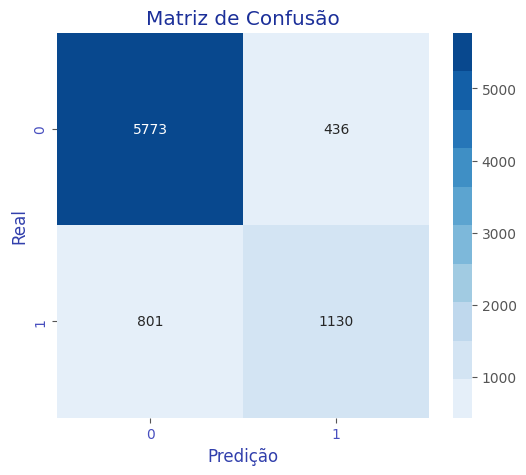

In [50]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(Y_val, grid_predictions)
precision_macro = precision_score(Y_val, grid_predictions, average='macro')
recall_macro = recall_score(Y_val, grid_predictions, average='macro')
f1_macro = f1_score(Y_val, grid_predictions, average='macro')

cm = confusion_matrix(Y_val, grid_predictions)

# Impressões
print('Métricas\n')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision_macro:.4f}')
print(f'Revocação: {recall_macro:.4f}')
print(f'F1: {f1_macro:.4f}')
print(f'Erro Empírico: {1 - accuracy:.4f}\n')

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap = sns.color_palette("Blues", 10), xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predição', color = '#313fac')
plt.ylabel('Real', color = '#313fac')
plt.xticks(color='#484fbf')
plt.yticks(color='#484fbf')
plt.title('Matriz de Confusão', color = '#1b2f99')
plt.show()

### Floresta Aleatória

Vamos fazer uma busca exaustiva de hiperparâmetros:
n_estimators | criterion | min_impurity_decrease
:-: | :-: | :-: 
{50, 75, 100, 250, 500}| {'gini', 'entropy'} | {0.0, 0.0001, 0.001}

Com auxílio do GridSearchCV, temos os seguintes resultados:

Os melhores parâmetros: {'criterion': 'entropy', 'min_impurity_decrease': 0.0001, 'n_estimators': 250}, temos uma margem para evitar overfitting

Com as métricas

Acurácia | Precisão | Revocação | F1 | Erro Empírico
:-: | :-: | :-: | :-: | :-: 
0.8596 | 0.8269 | 0.7608 | 0.7854 | 0.1412

Uma acurácia razoável, mas, que tende a pesar a revocação, com falsos negativos

In [51]:
param_grid = {'n_estimators' : [50, 75, 100, 250, 500],
              'criterion' : ['gini', 'entropy'],
              'min_impurity_decrease' : [0.0, 0.0001, 0.001]
             }

RF = RandomForestClassifier()

BestRF = GridSearchCV(RF, param_grid, verbose = 3) 
BestRF.fit(X_train, Y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=50;, score=0.842 total time=   0.9s
[CV 2/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=50;, score=0.851 total time=   0.9s
[CV 3/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=50;, score=0.841 total time=   0.9s
[CV 4/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=50;, score=0.844 total time=   0.9s
[CV 5/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=50;, score=0.844 total time=   0.9s
[CV 1/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=75;, score=0.841 total time=   1.4s
[CV 2/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=75;, score=0.850 total time=   1.4s
[CV 3/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=75;, score=0.844 total time=   1.4s
[CV 4/5] END criterion=gini, min_impurity_decrease=0.0, n_estimators=75;, score=0.841 total time= 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': [0.0, 0.0001, 0.001],
                         'n_estimators': [50, 75, 100, 250, 500]},
             verbose=3)

#### Avaliações

In [52]:
# Os melhores Parâmetros
print(BestRF.best_params_) 
  
# O melhor estimador 
print(BestRF.best_estimator_) 

grid_predictions = BestRF.predict(X_val) 
  
# Então, a análise final
print(classification_report(Y_val, grid_predictions)) 

{'criterion': 'entropy', 'min_impurity_decrease': 0.0001, 'n_estimators': 75}
RandomForestClassifier(criterion='entropy', min_impurity_decrease=0.0001,
                       n_estimators=75)
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6209
           1       0.78      0.57      0.66      1931

    accuracy                           0.86      8140
   macro avg       0.83      0.76      0.79      8140
weighted avg       0.85      0.86      0.85      8140



Métricas

Acurácia: 0.8597
Precisão: 0.8275
Revocação: 0.7605
F1: 0.7854
Erro Empírico: 0.1403



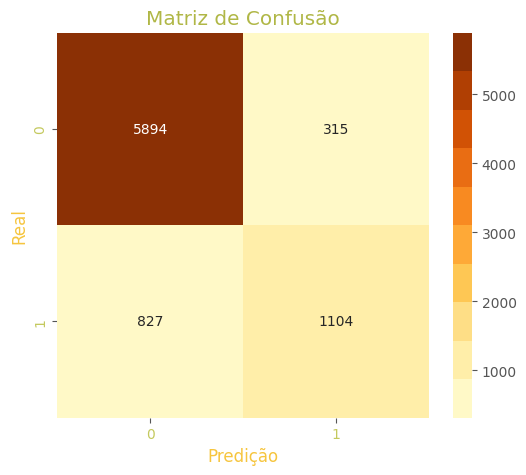

In [53]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(Y_val, grid_predictions)
precision_macro = precision_score(Y_val, grid_predictions, average='macro')
recall_macro = recall_score(Y_val, grid_predictions, average='macro')
f1_macro = f1_score(Y_val, grid_predictions, average='macro')

cm = confusion_matrix(Y_val, grid_predictions)

# Impressões
print('Métricas\n')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision_macro:.4f}')
print(f'Revocação: {recall_macro:.4f}')
print(f'F1: {f1_macro:.4f}')
print(f'Erro Empírico: {1 - accuracy:.4f}\n')

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap = sns.color_palette("YlOrBr", 10), xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predição', color = '#f6c53e')
plt.ylabel('Real', color = '#f6c53e')
plt.xticks(color='#c4c95e')
plt.yticks(color='#c4c95e')
plt.title('Matriz de Confusão', color = '#b0b746')
plt.show()

### ADA Boost

Vamos fazer uma busca exaustiva de hiperparâmetros:
n_estimators | learning_rate
:-: | :-: 
{50, 75, 100, 250, 500}| {0.5, 1.0, 2.5, 5.0, 7.5} 

Com auxílio do GridSearchCV, temos os seguintes resultados:

Os melhores parâmetros: {'learning_rate': 1.0, 'n_estimators': 500}

Com as métricas

Acurácia | Precisão | Revocação | F1 | Erro Empírico
:-: | :-: | :-: | :-: | :-: 
0.8672 | 0.8301 | 0.7849 | 0.8036 | 0.1328 

Uma acurácia razoável, mas, que tende a pesar a precisão, com falsos positivos

In [54]:
param_grid = {'n_estimators' : [50, 75, 100, 250, 500],
              'learning_rate' : [0.5, 1.0, 2.5, 5.0, 7.5]
             }

Ada = AdaBoostClassifier()

BestAda = GridSearchCV(Ada, param_grid, verbose = 3) 
BestAda.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END learning_rate=0.5, n_estimators=50;, score=0.860 total time=   0.7s
[CV 2/5] END learning_rate=0.5, n_estimators=50;, score=0.857 total time=   0.7s
[CV 3/5] END learning_rate=0.5, n_estimators=50;, score=0.851 total time=   0.7s
[CV 4/5] END learning_rate=0.5, n_estimators=50;, score=0.848 total time=   0.7s
[CV 5/5] END learning_rate=0.5, n_estimators=50;, score=0.855 total time=   0.7s
[CV 1/5] END learning_rate=0.5, n_estimators=75;, score=0.863 total time=   1.0s
[CV 2/5] END learning_rate=0.5, n_estimators=75;, score=0.858 total time=   1.1s
[CV 3/5] END learning_rate=0.5, n_estimators=75;, score=0.853 total time=   1.0s
[CV 4/5] END learning_rate=0.5, n_estimators=75;, score=0.848 total time=   1.0s
[CV 5/5] END learning_rate=0.5, n_estimators=75;, score=0.855 total time=   1.0s
[CV 1/5] END learning_rate=0.5, n_estimators=100;, score=0.865 total time=   1.3s
[CV 2/5] END learning_rate=0.5, n_estimators=1

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1.0, 2.5, 5.0, 7.5],
                         'n_estimators': [50, 75, 100, 250, 500]},
             verbose=3)

In [55]:
# Os melhores Parâmetros
print(BestAda.best_params_) 
  
# O melhor estimador 
print(BestAda.best_estimator_) 

grid_predictions = BestAda.predict(X_val) 
  
# Então, a análise final
print(classification_report(Y_val, grid_predictions)) 

{'learning_rate': 1.0, 'n_estimators': 500}
AdaBoostClassifier(n_estimators=500)
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6209
           1       0.77      0.63      0.69      1931

    accuracy                           0.87      8140
   macro avg       0.83      0.78      0.80      8140
weighted avg       0.86      0.87      0.86      8140



Métricas

Acurácia: 0.8672
Precisão: 0.8301
Revocação: 0.7849
F1: 0.8036
Erro Empírico: 0.1328



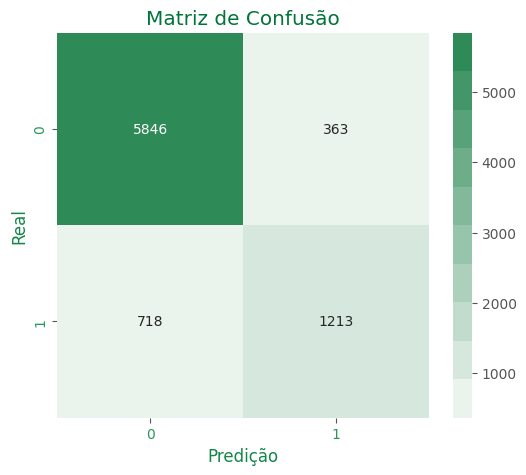

In [56]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(Y_val, grid_predictions)
precision_macro = precision_score(Y_val, grid_predictions, average='macro')
recall_macro = recall_score(Y_val, grid_predictions, average='macro')
f1_macro = f1_score(Y_val, grid_predictions, average='macro')

cm = confusion_matrix(Y_val, grid_predictions)

# Impressões
print('Métricas\n')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision_macro:.4f}')
print(f'Revocação: {recall_macro:.4f}')
print(f'F1: {f1_macro:.4f}')
print(f'Erro Empírico: {1 - accuracy:.4f}\n')

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap = sns.light_palette("seagreen", 10), xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predição', color = '#13864a')
plt.ylabel('Real', color = '#13864a')
plt.xticks(color='#26995a')
plt.yticks(color='#26995a')
plt.title('Matriz de Confusão', color = '#007439')
plt.show()

# Entrega Final

Apesar de todos estarem próximos, como métrica do erro empírico, o melhor modelo foi o AdaBoost

In [57]:
ModeloCompetitivo = BestAda

In [58]:
# Cálculo das Previsões
previsoes = ModeloCompetitivo.predict(X_teste)

In [59]:
# Criação de um Dataset para submissão
submissao = pd.DataFrame()
submissao[0] = X_teste.index
submissao[1] = previsoes
submissao.columns = ['Id','income']

In [60]:
submissao.head()

Id  income
0   0       0
1   1       1
2   2       0
3   3       0
4   4       1

In [61]:
# Reconvertendo os valores do target "income" para a forma original
# Ou seja, reconverter os valores (0,1) -> (<=50k, >50k)
remap = {0:'<=50K', 1:'>50K'}

classes = submissao['income'].unique()
for item in classes:
  if item not in remap.keys():
    remap[item] = item

submissao['income'] = submissao['income'].apply(lambda x: remap[x])

In [62]:
# Converte para a forma padrao para submissao no Kaggle
submissao.to_csv('submission.csv',index = False)